## Import the python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

In [2]:
# Ignore the future errors
warnings.simplefilter('ignore')

## Import Datasets

In [3]:
# Import the three datasets that have been provided
data1 = pd.read_csv('datasets\col_mat_nuw_output.csv',header=None)
data2 = pd.read_csv('datasets\kan_output.csv',header=None)
data3 = pd.read_csv('datasets\mon_kur_jaf_output.csv',header=None)

In [4]:
# Join the three datasets to a one dataframe
data = pd.concat([data1,data2,data3])
data = data.reset_index(drop=True)

In [5]:
# Add the column names
column_names = ["HCHO Reading", "Location", "Current Date", "Next Date"]
data.columns = column_names

In [6]:
data.head()

HCHO Reading        Location Current Date   Next Date
0      0.000197  Colombo Proper   2019-01-01  2019-01-02
1      0.000263  Colombo Proper   2019-01-02  2019-01-03
2      0.000099  Colombo Proper   2019-01-03  2019-01-04
3      0.000210  Colombo Proper   2019-01-04  2019-01-05
4      0.000179  Colombo Proper   2019-01-05  2019-01-06

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12782 entries, 0 to 12781
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  7918 non-null   float64
 1   Location      12782 non-null  object 
 2   Current Date  12782 non-null  object 
 3   Next Date     12782 non-null  object 
dtypes: float64(1), object(3)
memory usage: 399.6+ KB


## Data Preprocessing

In [8]:
# Count of duplicates
data.duplicated().value_counts()

False    12782
Name: count, dtype: int64

In [9]:
# Get the sum of the null values in each column
data.isnull().sum()

HCHO Reading    4864
Location           0
Current Date       0
Next Date          0
dtype: int64

In [10]:
data['Location'].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [11]:
# Gather the data taken from Colombo area
colombo_data = data[data['Location'] == 'Colombo Proper']

# Check null values
colombo_data.isnull().sum()

HCHO Reading    487
Location          0
Current Date      0
Next Date         0
dtype: int64

In [12]:
# Add the mean value to the null values
mean_value = colombo_data['HCHO Reading'].mean()
colombo_data['HCHO Reading'].fillna(mean_value, inplace=True)

# Confirm that the null values have been handled
colombo_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [13]:
# Gather the data taken from Deniyaya area
deniyaya_data = data[data['Location'] == 'Deniyaya, Matara']

# Check null values
deniyaya_data.isnull().sum()

HCHO Reading    847
Location          0
Current Date      0
Next Date         0
dtype: int64

In [14]:
# Add the mean value to the null values
mean_value = deniyaya_data['HCHO Reading'].mean()
deniyaya_data['HCHO Reading'].fillna(mean_value, inplace=True)

# Confirm that the null values have been handled
deniyaya_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [15]:
# Gather the data taken from Nuwara Eliya area
nuwaraeliya_data = data[data['Location'] == 'Nuwara Eliya Proper']
nuwaraeliya_data.isnull().sum()

HCHO Reading    1085
Location           0
Current Date       0
Next Date          0
dtype: int64

In [16]:
# Add the mean value to the null values
mean_value = nuwaraeliya_data['HCHO Reading'].mean()
nuwaraeliya_data['HCHO Reading'].fillna(mean_value, inplace=True)

# Confirm that the null values have been handled
nuwaraeliya_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [17]:
# Gather the data taken from Colombo area
kandy_data = data[data['Location'] == 'Kandy Proper']

# Check null values
kandy_data.isnull().sum()

HCHO Reading    793
Location          0
Current Date      0
Next Date         0
dtype: int64

In [18]:
# Add the mean value to the null values
mean_value = kandy_data['HCHO Reading'].mean()
kandy_data['HCHO Reading'].fillna(mean_value, inplace=True)

# Confirm that the null values have been handled
kandy_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [19]:
# Gather the data taken from Bibile area
bibile_data = data[data['Location'] == 'Bibile, Monaragala']

# Check null values
bibile_data.isnull().sum()

HCHO Reading    695
Location          0
Current Date      0
Next Date         0
dtype: int64

In [20]:
# Add the mean value to the null values
mean_value = bibile_data['HCHO Reading'].mean()
bibile_data['HCHO Reading'].fillna(mean_value, inplace=True)

# Confirm that the null values have been handled
bibile_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [21]:
# Gather the data taken from Kurunegala area
kurunegala_data = data[data['Location'] == 'Kurunegala Proper']

# Check null values
kurunegala_data.isnull().sum()

HCHO Reading    592
Location          0
Current Date      0
Next Date         0
dtype: int64

In [22]:
# Add the mean value to the null values
mean_value = kurunegala_data['HCHO Reading'].mean()
kurunegala_data['HCHO Reading'].fillna(mean_value, inplace=True)

# Confirm that the null values have been handled
kurunegala_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [23]:
# Gather the data taken from Jaffna area
jaffna_data = data[data['Location'] == 'Jaffna Proper']

# Check null values
jaffna_data.isnull().sum()

HCHO Reading    365
Location          0
Current Date      0
Next Date         0
dtype: int64

In [24]:
# Add the mean value to the null values
mean_value = jaffna_data['HCHO Reading'].mean()
jaffna_data['HCHO Reading'].fillna(mean_value, inplace=True)

# Confirm that the null values have been handled
jaffna_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

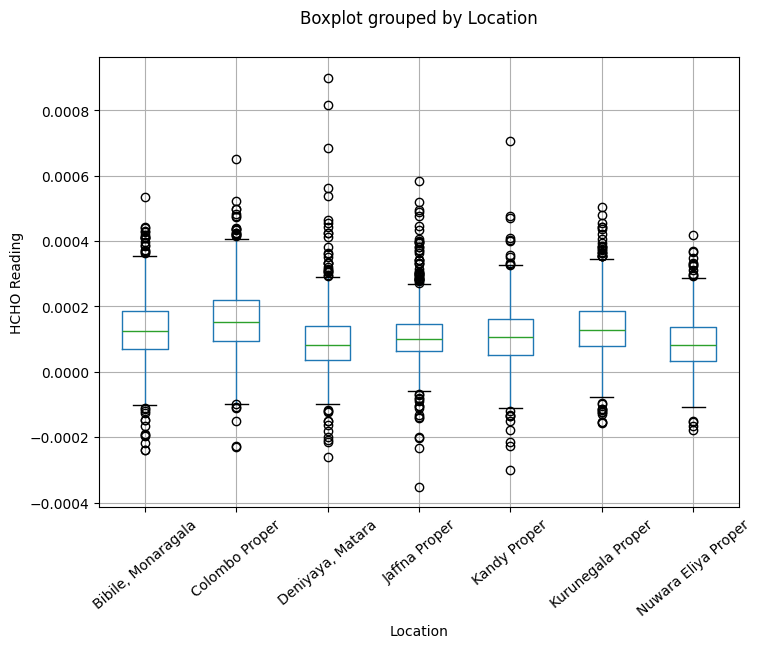

In [25]:
# Plot boxplots for each location
fig, ax = plt.subplots(figsize=(8, 6))
data.boxplot(column='HCHO Reading', by='Location', ax=ax)
ax.set_title(' ')
ax.set_xlabel('Location')
ax.set_ylabel('HCHO Reading')
plt.xticks(rotation=40)
plt.show()

In [26]:
# Calculate 1st Quartile and 3rd quartile
Q1 = colombo_data['HCHO Reading'].quantile(0.25)
Q3 = colombo_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (colombo_data['HCHO Reading'] < lower_bound) | (colombo_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
colombo_data.loc[bounds, 'HCHO Reading'] = np.mean(colombo_data.loc[~bounds, 'HCHO Reading'])

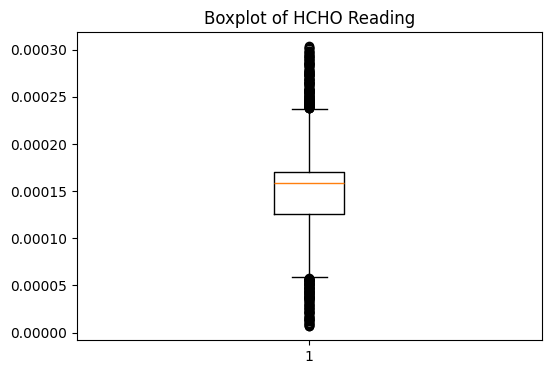

In [27]:
# Plot the boxplot of the specific column
column_name = 'HCHO Reading'
plt.figure(figsize=(6, 4))
plt.boxplot(colombo_data[column_name])
plt.title('Boxplot of ' + column_name)
plt.show()

In [28]:
# Calculate 1st Quartile and 3rd quartile
Q1 = bibile_data['HCHO Reading'].quantile(0.25)
Q3 = bibile_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (bibile_data['HCHO Reading'] < lower_bound) | (bibile_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
bibile_data.loc[bounds, 'HCHO Reading'] = np.mean(bibile_data.loc[~bounds, 'HCHO Reading'])

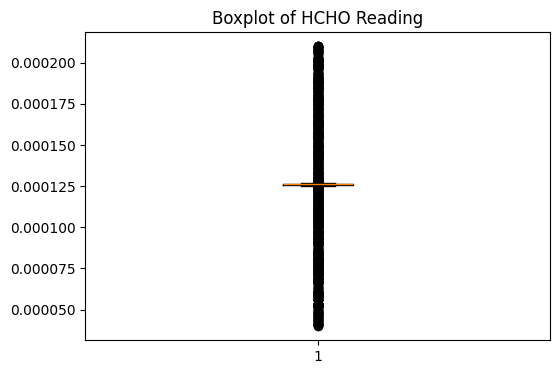

In [29]:
# Plot the boxplot of the specific column
column_name = 'HCHO Reading'
plt.figure(figsize=(6, 4))
plt.boxplot(bibile_data[column_name])
plt.title('Boxplot of ' + column_name)
plt.show()

In [30]:
# Calculate 1st Quartile and 3rd quartile
Q1 = deniyaya_data['HCHO Reading'].quantile(0.25)
Q3 = deniyaya_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (deniyaya_data['HCHO Reading'] < lower_bound) | (deniyaya_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
deniyaya_data.loc[bounds, 'HCHO Reading'] = np.mean(deniyaya_data.loc[~bounds, 'HCHO Reading'])

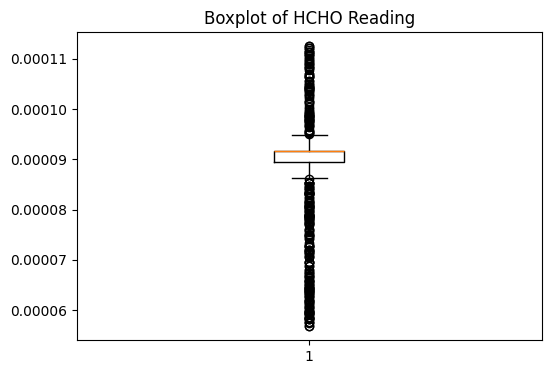

In [31]:
# Plot the boxplot of the specific column
column_name = 'HCHO Reading'
plt.figure(figsize=(6, 4))
plt.boxplot(deniyaya_data[column_name])
plt.title('Boxplot of ' + column_name)
plt.show()

In [32]:
# Calculate 1st Quartile and 3rd quartile
Q1 = jaffna_data['HCHO Reading'].quantile(0.25)
Q3 = jaffna_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (jaffna_data['HCHO Reading'] < lower_bound) | (jaffna_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
jaffna_data.loc[bounds, 'HCHO Reading'] = np.mean(jaffna_data.loc[~bounds, 'HCHO Reading'])

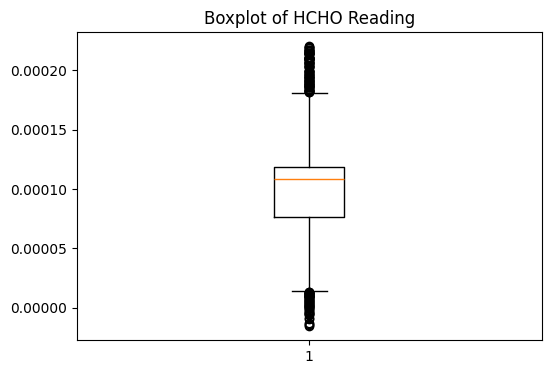

In [33]:
# Plot the boxplot of the specific column
column_name = 'HCHO Reading'
plt.figure(figsize=(6, 4))
plt.boxplot(jaffna_data[column_name])
plt.title('Boxplot of ' + column_name)
plt.show()

In [34]:
# Calculate 1st Quartile and 3rd quartile
Q1 = kurunegala_data['HCHO Reading'].quantile(0.25)
Q3 = kurunegala_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (kurunegala_data['HCHO Reading'] < lower_bound) | (kurunegala_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
kurunegala_data.loc[bounds, 'HCHO Reading'] = np.mean(kurunegala_data.loc[~bounds, 'HCHO Reading'])

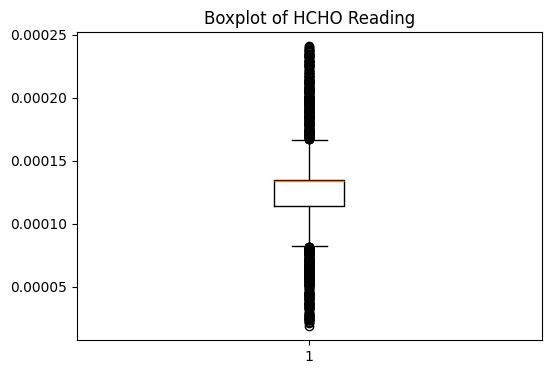

In [35]:
# Plot the boxplot of the specific column
column_name = 'HCHO Reading'
plt.figure(figsize=(6, 4))
plt.boxplot(kurunegala_data[column_name])
plt.title('Boxplot of ' + column_name)
plt.show()

In [36]:
# Calculate 1st Quartile and 3rd quartile
Q1 = kandy_data['HCHO Reading'].quantile(0.25)
Q3 = kandy_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (kandy_data['HCHO Reading'] < lower_bound) | (kandy_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
kandy_data.loc[bounds, 'HCHO Reading'] = np.mean(kandy_data.loc[~bounds, 'HCHO Reading'])

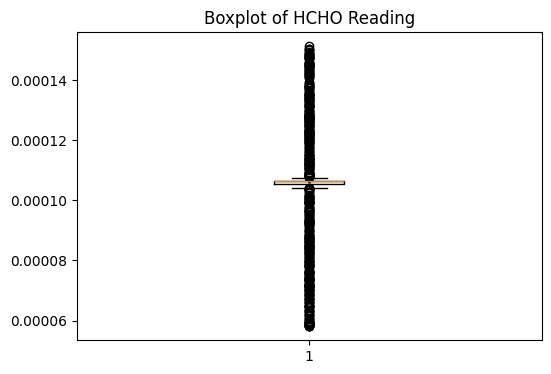

In [37]:
# Plot the boxplot of the specific column
column_name = 'HCHO Reading'
plt.figure(figsize=(6, 4))
plt.boxplot(kandy_data[column_name])
plt.title('Boxplot of ' + column_name)
plt.show()

In [38]:
# Combine the preprocessed datasets
combined_data = pd.concat([nuwaraeliya_data, colombo_data, deniyaya_data, kandy_data, kurunegala_data, bibile_data, jaffna_data])
combined_data = combined_data.reset_index(drop=True)

In [39]:
# Transform the date columns from object data type to standard date type
combined_data['Current Date'] = pd.to_datetime(combined_data['Current Date'])
combined_data['Next Date'] = pd.to_datetime(combined_data['Next Date'])

In [40]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12782 entries, 0 to 12781
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  12782 non-null  float64       
 1   Location      12782 non-null  object        
 2   Current Date  12782 non-null  datetime64[ns]
 3   Next Date     12782 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 399.6+ KB


In [41]:
combined_data['Location'].unique()

array(['Nuwara Eliya Proper', 'Colombo Proper', 'Deniyaya, Matara',
       'Kandy Proper', 'Kurunegala Proper', 'Bibile, Monaragala',
       'Jaffna Proper'], dtype=object)

In [42]:
# Change the location names to suitable names
combined_data['Location'] = combined_data['Location'].replace('Nuwara Eliya Proper', 'NUWARA ELIYA')
combined_data['Location'] = combined_data['Location'].replace('Colombo Proper', 'COLOMBO')
combined_data['Location'] = combined_data['Location'].replace('Kandy Proper', 'KANDY')
combined_data['Location'] = combined_data['Location'].replace('Kurunegala Proper', 'KURUNEGALA')
combined_data['Location'] = combined_data['Location'].replace('Jaffna Proper', 'JAFFNA')
combined_data['Location'] = combined_data['Location'].replace('Deniyaya, Matara', 'DENIYAYA, MATARA')
combined_data['Location'] = combined_data['Location'].replace('Bibile, Monaragala', 'BIBILE, MONARAGALA')

In [43]:
combined_data['Location'].unique()

array(['NUWARA ELIYA', 'COLOMBO', 'DENIYAYA, MATARA', 'KANDY',
       'KURUNEGALA', 'BIBILE, MONARAGALA', 'JAFFNA'], dtype=object)

<Figure size 1000x600 with 0 Axes>

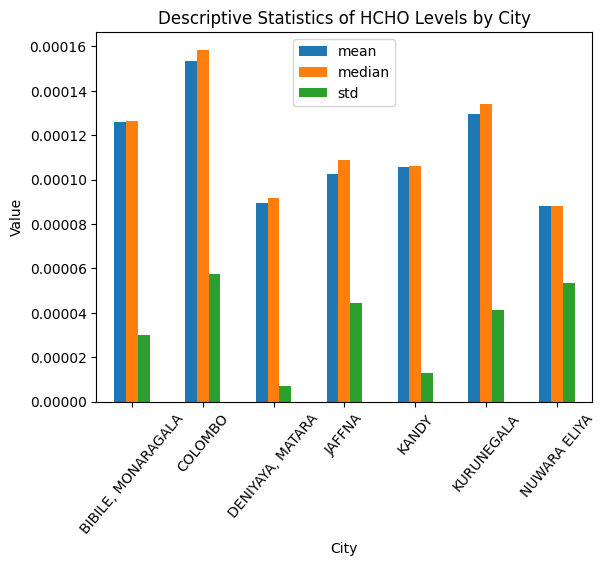

In [44]:
# Calculate mean, median and standard deviation for the HCHO levels of each location
stats_by_city = combined_data.groupby('Location')['HCHO Reading'].agg(['mean', 'median', 'std'])
overall_stats = combined_data['HCHO Reading'].agg(['mean', 'median', 'std'])

# Plot descriptive statistics for each city
plt.figure(figsize=(10, 6))
stats_by_city.plot(kind='bar')
plt.title('Descriptive Statistics of HCHO Levels by City')
plt.xlabel('City')
plt.ylabel('Value')
plt.xticks(rotation=50)
plt.show()


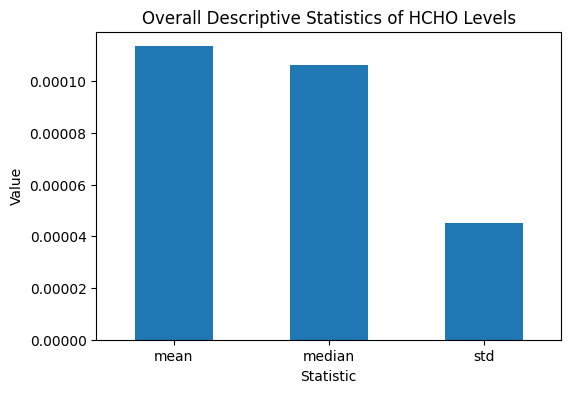

In [45]:
# Plot overall descriptive statistics
plt.figure(figsize=(6, 4))
overall_stats.plot(kind='bar')
plt.title('Overall Descriptive Statistics of HCHO Levels')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()

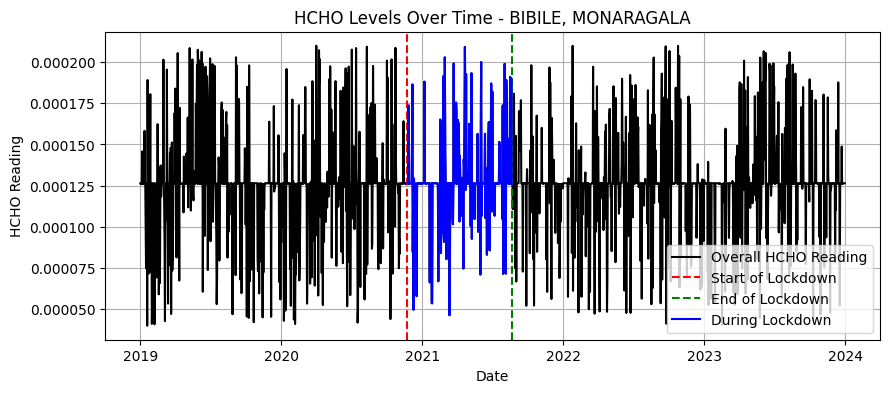

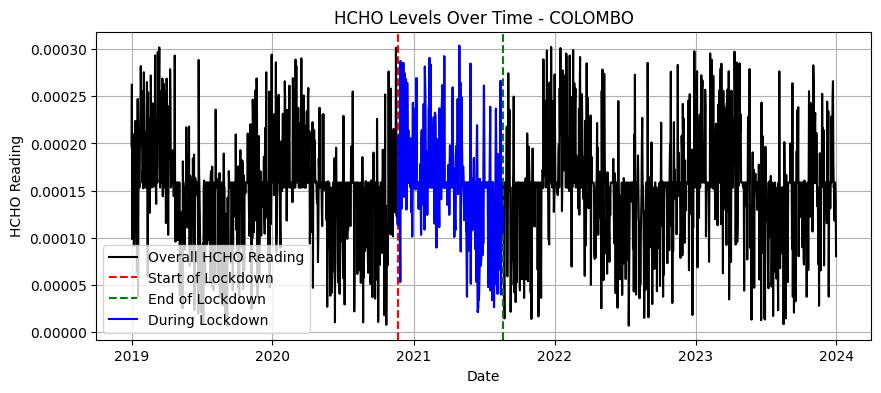

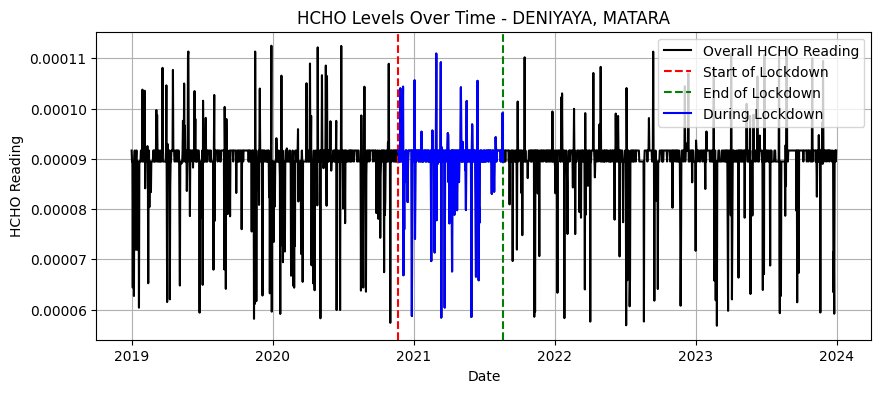

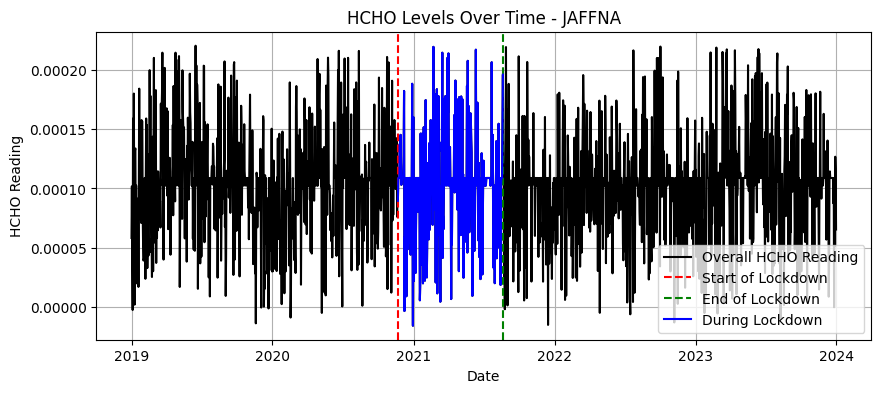

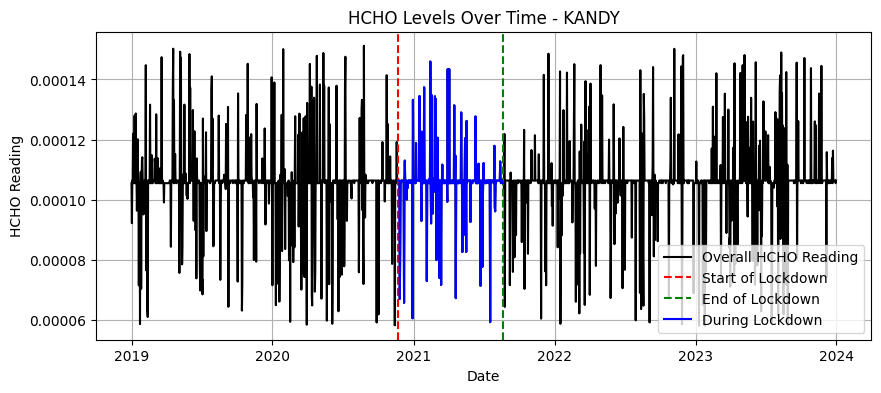

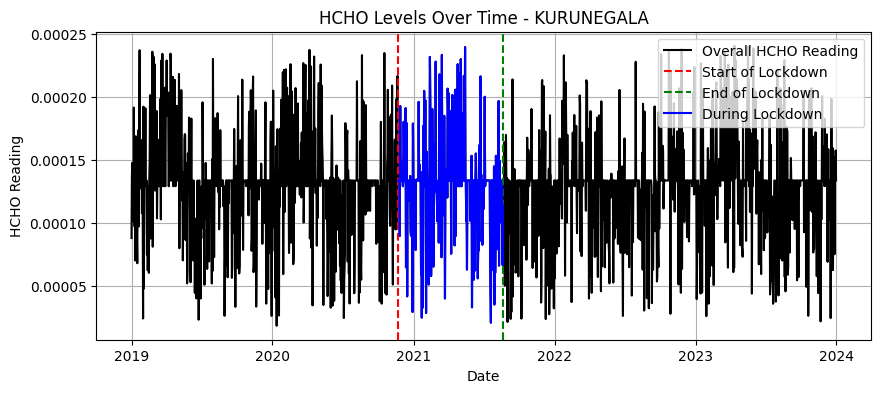

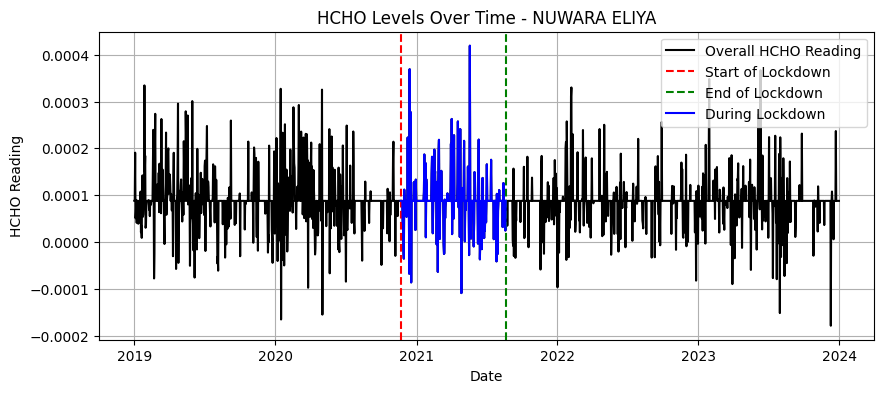

In [46]:
for location, data in combined_data.groupby('Location'):
    plt.figure(figsize=(10, 4))
    
    # Plot HCHO readings for the entire duration
    plt.plot(data['Current Date'], data['HCHO Reading'], color='black', label='Overall HCHO Reading')
    plt.title(f'HCHO Levels Over Time - {location}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Reading')
    
    # Add boundary lines for lockdown period
    plt.axvline(x=pd.to_datetime('2020-11-21'), color='red', linestyle='--', label='Start of Lockdown')
    plt.axvline(x=pd.to_datetime('2021-08-20'), color='green', linestyle='--', label='End of Lockdown')
    
    # Filter and plot HCHO readings during lockdown period
    lockdown_data = data[(data['Current Date'] >= '2020-11-21') & (data['Current Date'] <= '2021-08-20')]
    plt.plot(lockdown_data['Current Date'], lockdown_data['HCHO Reading'], color='blue', label='During Lockdown')
    
    # Display legend
    plt.legend()
    plt.grid(True)
    plt.show()


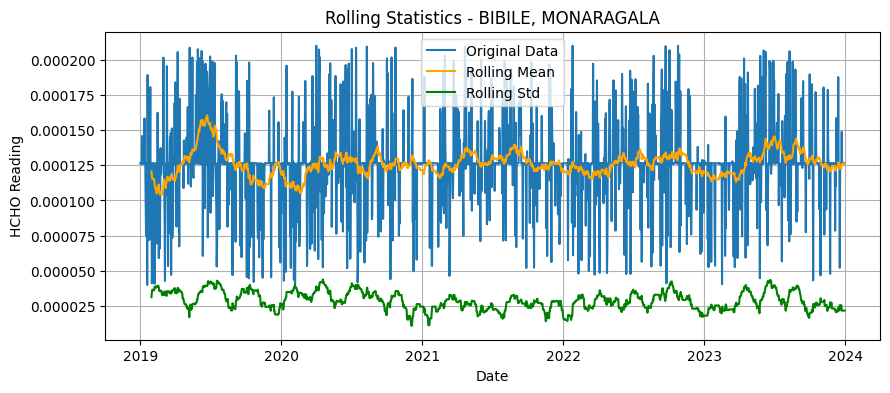

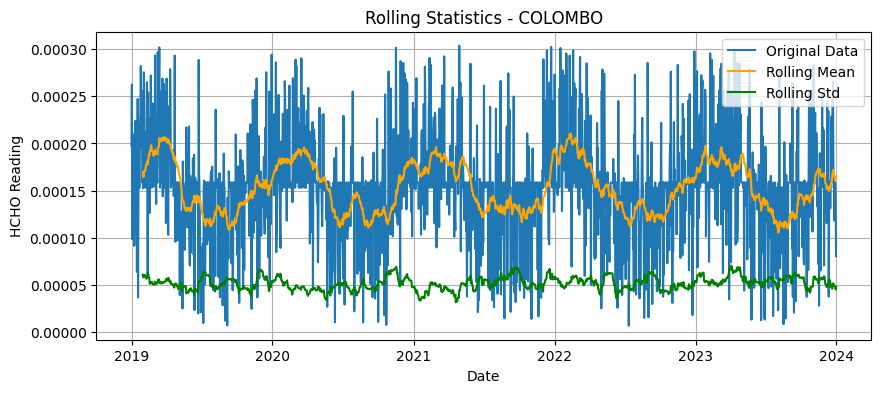

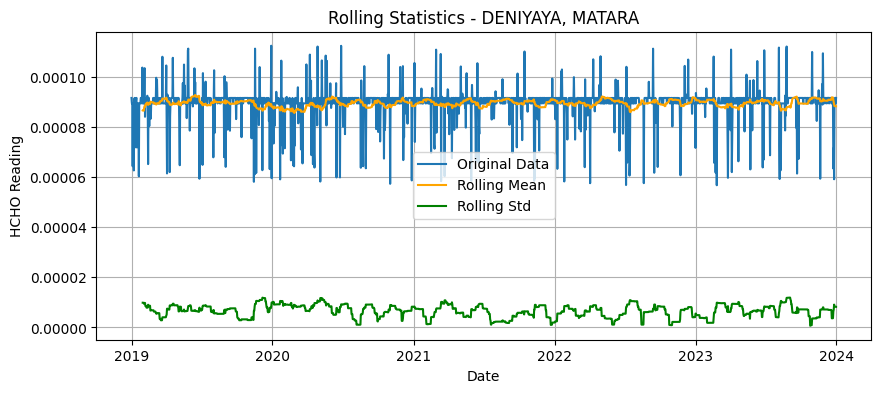

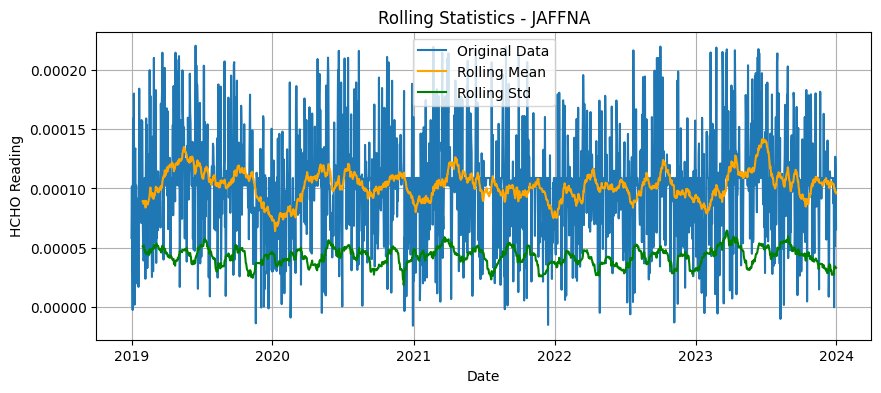

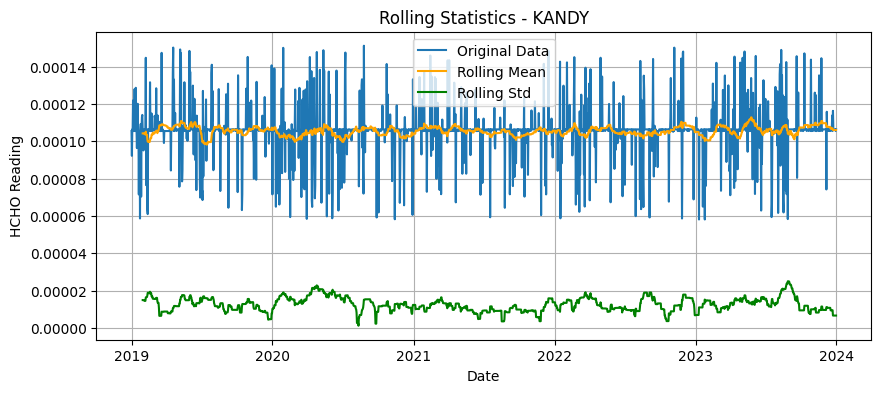

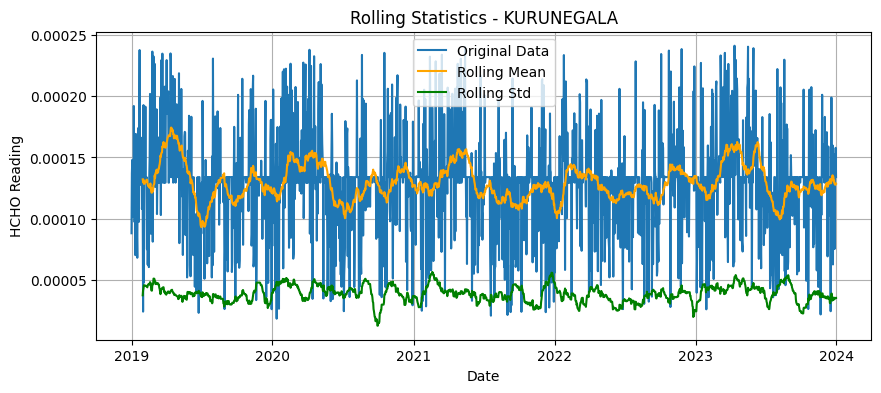

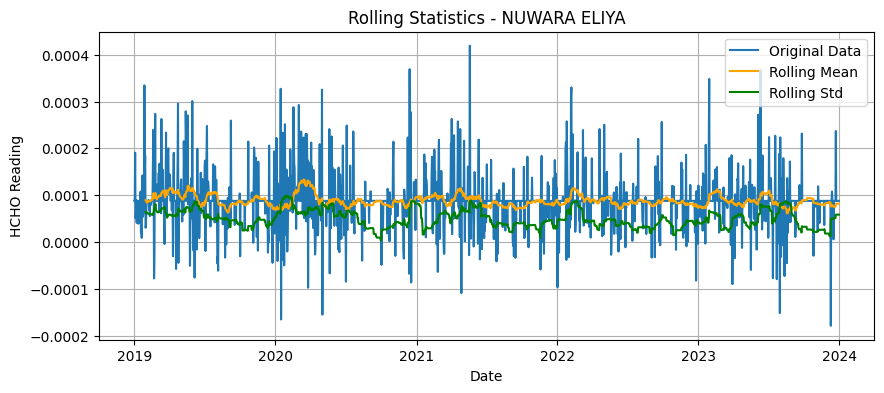

In [47]:
# Calculate rolling mean and standard deviation for each city
for location, data in combined_data.groupby('Location'):
    rolling_mean = data['HCHO Reading'].rolling(window=30).mean()
    rolling_std = data['HCHO Reading'].rolling(window=30).std()
    
    plt.figure(figsize=(10, 4))
    plt.plot(data['Current Date'], data['HCHO Reading'], label='Original Data')
    plt.plot(data['Current Date'], rolling_mean, label='Rolling Mean', color='orange')
    plt.plot(data['Current Date'], rolling_std, label='Rolling Std', color='green')
    plt.title(f'Rolling Statistics - {location}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Reading')
    plt.legend()
    plt.grid(True)
    plt.show()


### Import Datasets of the other external factors affecting the HCHO Level

In [48]:
# Get the additional data for the analysis
bibile_facts = pd.read_csv('datasets/moreData/Bibile,Monaragala.csv')
colombo_facts = pd.read_csv('datasets/moreData/Colombo.csv')
deniyaya_facts = pd.read_csv('datasets/moreData/Deniyaya,Matara.csv')
jaffna_facts = pd.read_csv('datasets/moreData/Jaffna.csv')
kandy_facts = pd.read_csv('datasets/moreData/Kandy.csv')
kurunegala_facts = pd.read_csv('datasets/moreData/Kurunegala.csv')
nuwaraeliya_facts = pd.read_csv('datasets/moreData/NuwaraEliya.csv')

In [49]:
# Create seperate dataframes for each location
hcho_bibile = combined_data[combined_data['Location']=='BIBILE, MONARAGALA']
hcho_colombo = combined_data[combined_data['Location']=='COLOMBO']
hcho_deniyaya = combined_data[combined_data['Location']=='DENIYAYA, MATARA']
hcho_jaffna = combined_data[combined_data['Location']=='JAFFNA']
hcho_kandy = combined_data[combined_data['Location']=='KANDY']
hcho_kurunegala = combined_data[combined_data['Location']=='KURUNEGALA']
hcho_nuwaraeliya = combined_data[combined_data['Location']=='NUWARA ELIYA']

In [50]:
nuwaraeliya_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           1826 non-null   int64  
 1   MONTH          1826 non-null   int64  
 2   DAY            1826 non-null   int64  
 3   PAR_TOT        1826 non-null   float64
 4   T2M            1826 non-null   float64
 5   EST            1826 non-null   float64
 6   SH2M           1826 non-null   float64
 7   RH2M           1826 non-null   float64
 8   PRECIPITATION  1826 non-null   float64
 9   SP             1826 non-null   float64
 10  WD10M          1826 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 157.0 KB


In [51]:
# Change the column names
nuwaraeliya_facts['Current Date'] = pd.to_datetime(nuwaraeliya_facts[['YEAR', 'MONTH', 'DAY']].astype(str).agg('-'.join, axis=1))
nuwaraeliya_facts.drop(columns=['YEAR', 'MONTH', 'DAY'], inplace=True)

In [52]:
nuwaraeliya_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PAR_TOT        1826 non-null   float64       
 1   T2M            1826 non-null   float64       
 2   EST            1826 non-null   float64       
 3   SH2M           1826 non-null   float64       
 4   RH2M           1826 non-null   float64       
 5   PRECIPITATION  1826 non-null   float64       
 6   SP             1826 non-null   float64       
 7   WD10M          1826 non-null   float64       
 8   Current Date   1826 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 128.5 KB


In [53]:
# Merge datasets using current date
nuwaraeliya_merged_data = pd.merge(hcho_nuwaraeliya, nuwaraeliya_facts, on='Current Date', how='inner')

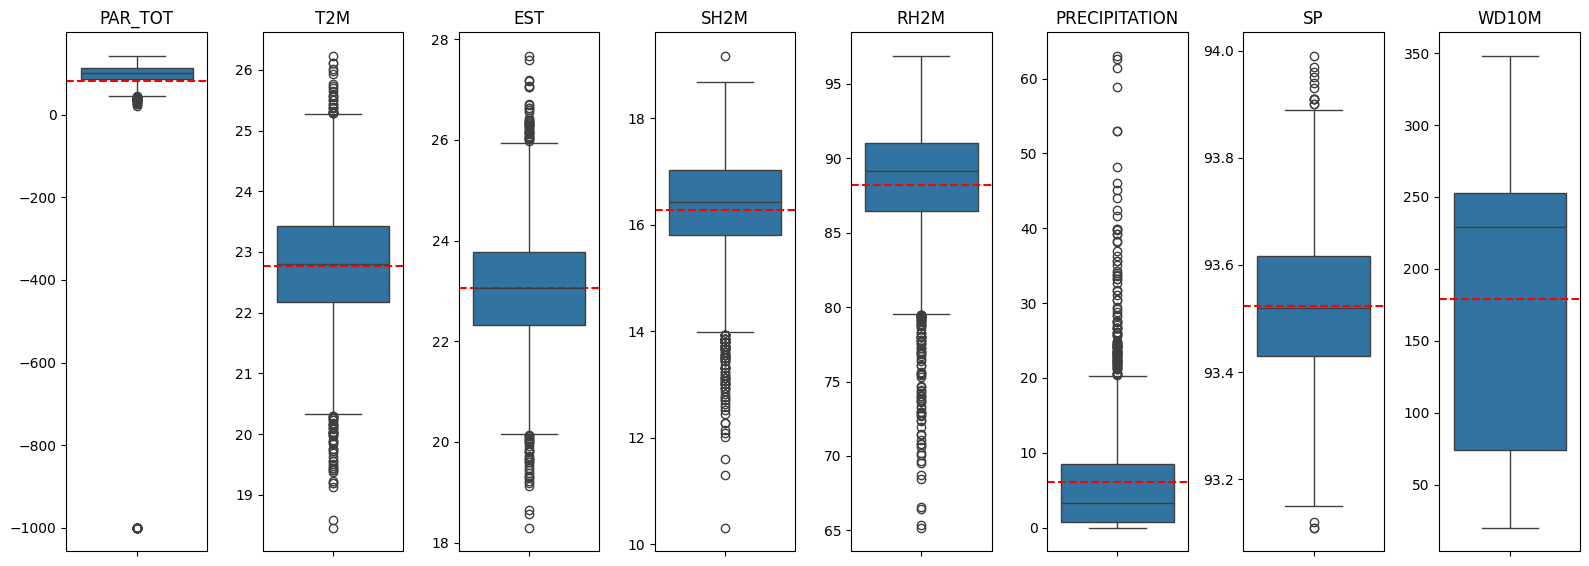

In [54]:
# Plot boxplots to identify outliers
def plot_boxplots(dataset, variables):
    plt.figure(figsize=(8, 6))
    for j, variable in enumerate(variables):
        plt.subplot(1, len(variables), j+1)
        ax = sns.boxplot(y=dataset[variable])
        ax.set(ylabel='')
        mean = dataset[variable].mean()
        plt.axhline(mean, color='r', linestyle='--')
        plt.title(f'{variable}')
    plt.tight_layout(rect=[0, 0, 2, 0.96])
    plt.show()

# Column names to be plot
plot_boxplots(nuwaraeliya_merged_data, ['PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M'])

In [55]:
# Remove the outliers in the column - Photosynthetically Active Radiation
nuwaraeliya_merged_data = nuwaraeliya_merged_data[nuwaraeliya_merged_data['PAR_TOT'] > 0]

In [56]:
# Columns to be preprocessed
columns = ['PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP']

# Handle outliers in other columns
for col in columns:
    # Calculate 1st Quartile and 3rd quartile
    Q1 = nuwaraeliya_merged_data[col].quantile(0.25)
    Q3 = nuwaraeliya_merged_data[col].quantile(0.75)

    # Calculate IQR 
    IQR = Q3 - Q1

    # Lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    bounds = (nuwaraeliya_merged_data[col] < lower_bound) | (nuwaraeliya_merged_data[col] > upper_bound)

    # Replace outlier values with the mean of non-outlier values
    nuwaraeliya_merged_data[col] = np.where(bounds, np.mean(nuwaraeliya_merged_data[~bounds][col]), nuwaraeliya_merged_data[col])


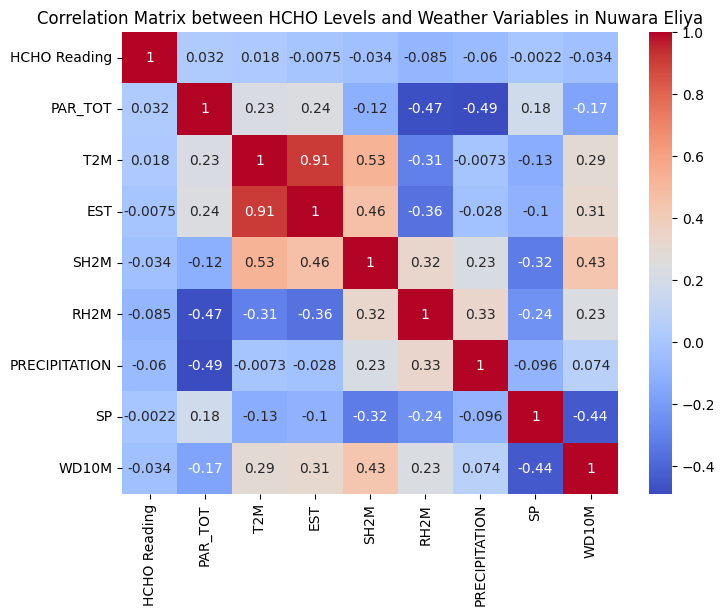

In [57]:
# Correlation matrix
correlation_matrix = nuwaraeliya_merged_data[['HCHO Reading', 'PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and Weather Variables in Nuwara Eliya')
plt.show()

In [58]:
# Change the column names
bibile_facts['Current Date'] = pd.to_datetime(bibile_facts[['YEAR', 'MONTH', 'DAY']].astype(str).agg('-'.join, axis=1))
bibile_facts.drop(columns=['YEAR', 'MONTH', 'DAY'], inplace=True)

In [59]:
# Merge datasets using current date
bibile_merged_data = pd.merge(hcho_bibile, bibile_facts, on='Current Date', how='inner')

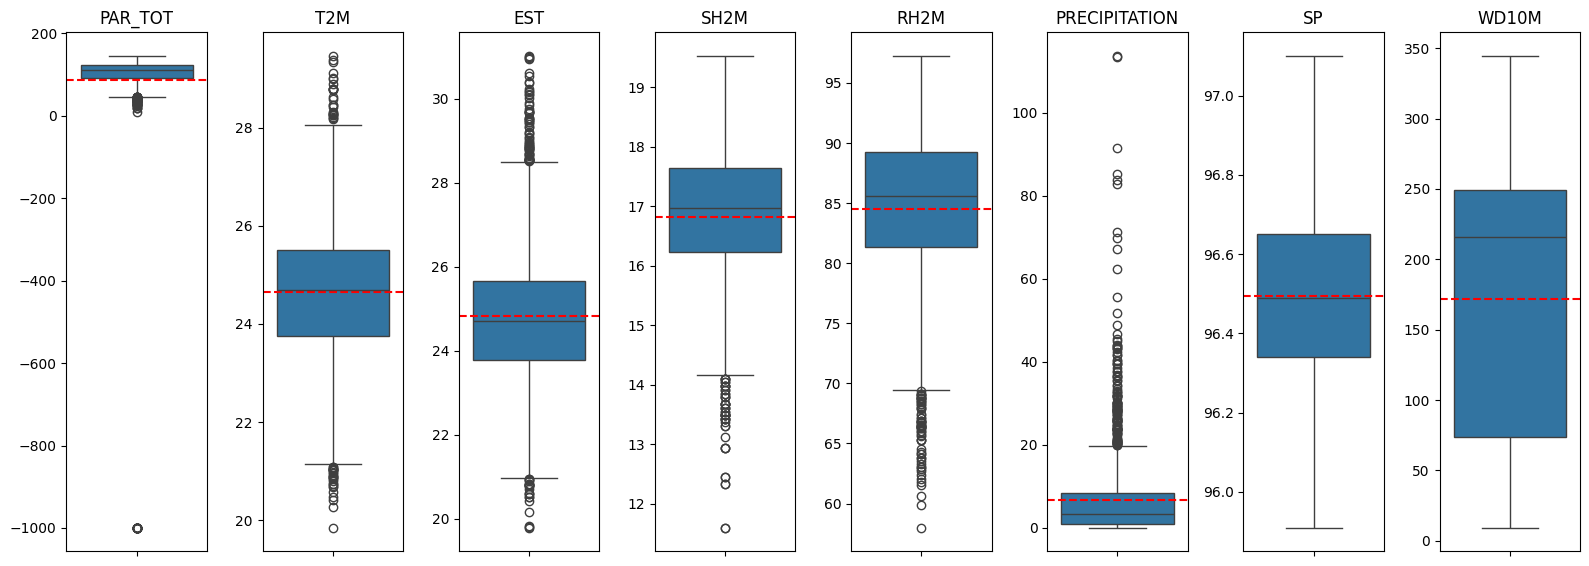

In [60]:
# Plot boxplots to identify outliers
def plot_boxplots(dataset, variables):
    plt.figure(figsize=(8, 6))
    for j, variable in enumerate(variables):
        plt.subplot(1, len(variables), j+1)
        ax = sns.boxplot(y=dataset[variable])
        ax.set(ylabel='')  # Remove y-axis title
        mean = dataset[variable].mean()
        plt.axhline(mean, color='r', linestyle='--')
        plt.title(f'{variable}')
    plt.tight_layout(rect=[0, 0, 2, 0.96])
    plt.show()

# Column names to be plot
plot_boxplots(bibile_merged_data, ['PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M'])

In [61]:
# Remove the outliers
bibile_merged_data = bibile_merged_data[bibile_merged_data['PAR_TOT'] > 0]

In [62]:
# Columns to be preprocessed
columns = ['PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP']

# Handle the rest of the outliers
for col in columns:
    # Calculate 1st Quartile and 3rd quartile
    Q1 = bibile_merged_data[col].quantile(0.25)
    Q3 = bibile_merged_data[col].quantile(0.75)

    # Calculate IQR 
    IQR = Q3 - Q1

    # Lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    bounds = (bibile_merged_data[col] < lower_bound) | (bibile_merged_data[col] > upper_bound)

    # Replace outlier values with the mean of non-outlier values
    bibile_merged_data[col] = np.where(bounds, np.mean(bibile_merged_data[~bounds][col]), bibile_merged_data[col])


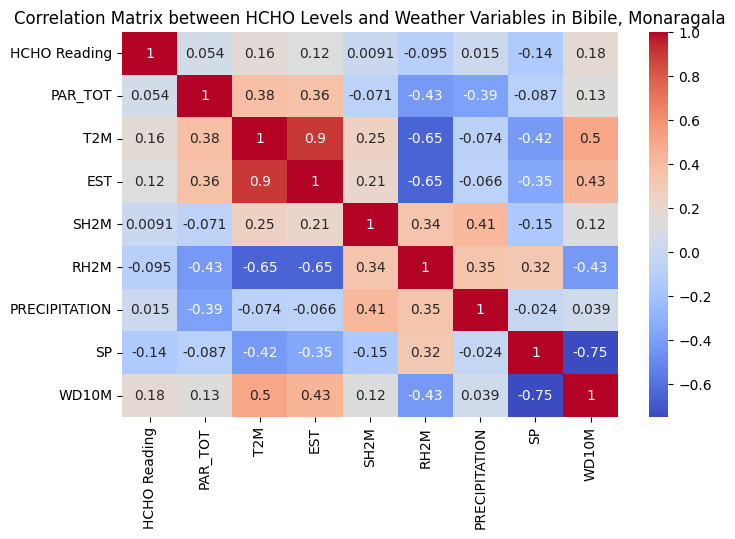

In [63]:
correlation_matrix = bibile_merged_data[['HCHO Reading', 'PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and Weather Variables in Bibile, Monaragala')
plt.show()

In [64]:
# Change the column names
colombo_facts['Current Date'] = pd.to_datetime(colombo_facts[['YEAR', 'MONTH', 'DAY']].astype(str).agg('-'.join, axis=1))
colombo_facts.drop(columns=['YEAR', 'MONTH', 'DAY'], inplace=True)

In [65]:
# Merge the data based on current date
colombo_merged_data = pd.merge(hcho_colombo, colombo_facts, on='Current Date', how='inner')

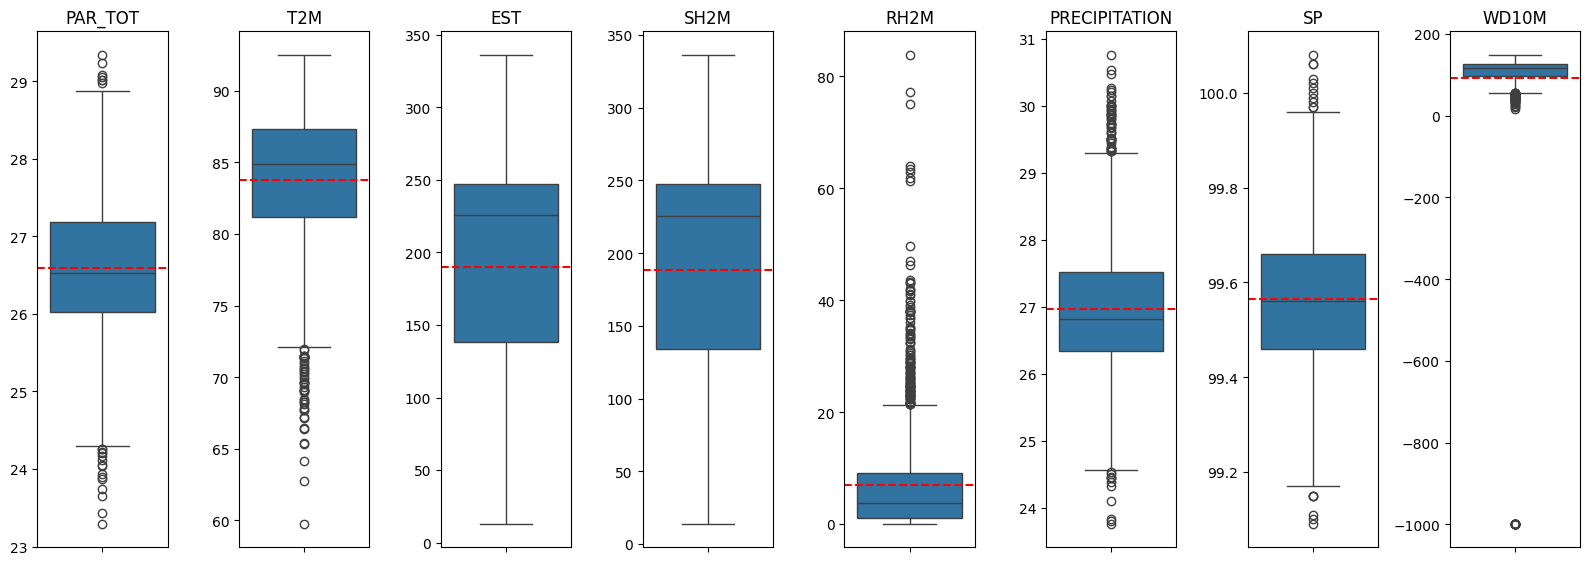

In [66]:
# Plot the boxplots
def plot_boxplots(dataset, variables):
    plt.figure(figsize=(8, 6))
    for j, variable in enumerate(variables):
        plt.subplot(1, len(variables), j+1)
        ax = sns.boxplot(y=dataset[variable])
        ax.set(ylabel='') # Remove y-axis title
        mean = dataset[variable].mean()
        plt.axhline(mean, color='r', linestyle='--')
        plt.title(f'{variable}')
    plt.tight_layout(rect=[0, 0, 2, 0.96])
    plt.show()

# Columns to be plot
plot_boxplots(colombo_merged_data, ['PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M'])

In [67]:
# Remove the outliers
colombo_merged_data = colombo_merged_data[colombo_merged_data['WD10M'] > 0]

In [68]:
# Columns to be preprocessed
columns = ['PAR_TOT', 'T2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M']

# Handle the other outliers
for col in columns:
    # Calculate 1st Quartile and 3rd quartile
    Q1 = colombo_merged_data[col].quantile(0.25)
    Q3 = colombo_merged_data[col].quantile(0.75)

    # Calculate IQR 
    IQR = Q3 - Q1

    # Lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    bounds = (colombo_merged_data[col] < lower_bound) | (colombo_merged_data[col] > upper_bound)

    # Replace outlier values with the mean of non-outlier values
    colombo_merged_data[col] = np.where(bounds, np.mean(colombo_merged_data[~bounds][col]), colombo_merged_data[col])


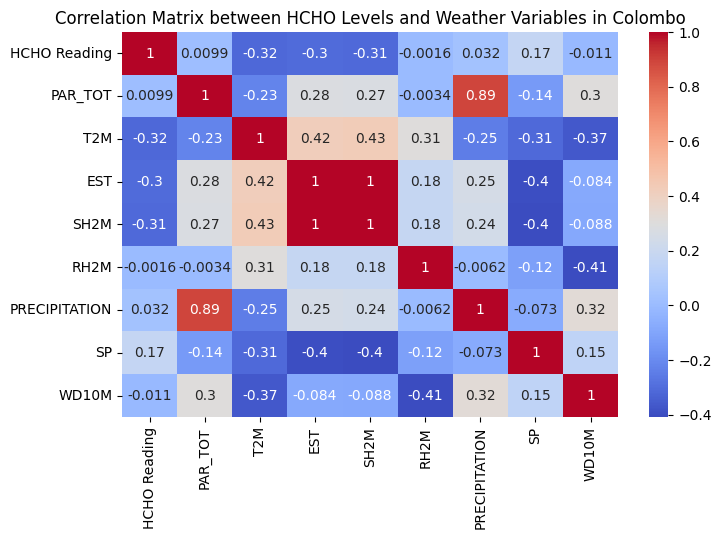

In [69]:
# Correlation matrix
correlation_matrix = colombo_merged_data[['HCHO Reading', 'PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and Weather Variables in Colombo')
plt.show()

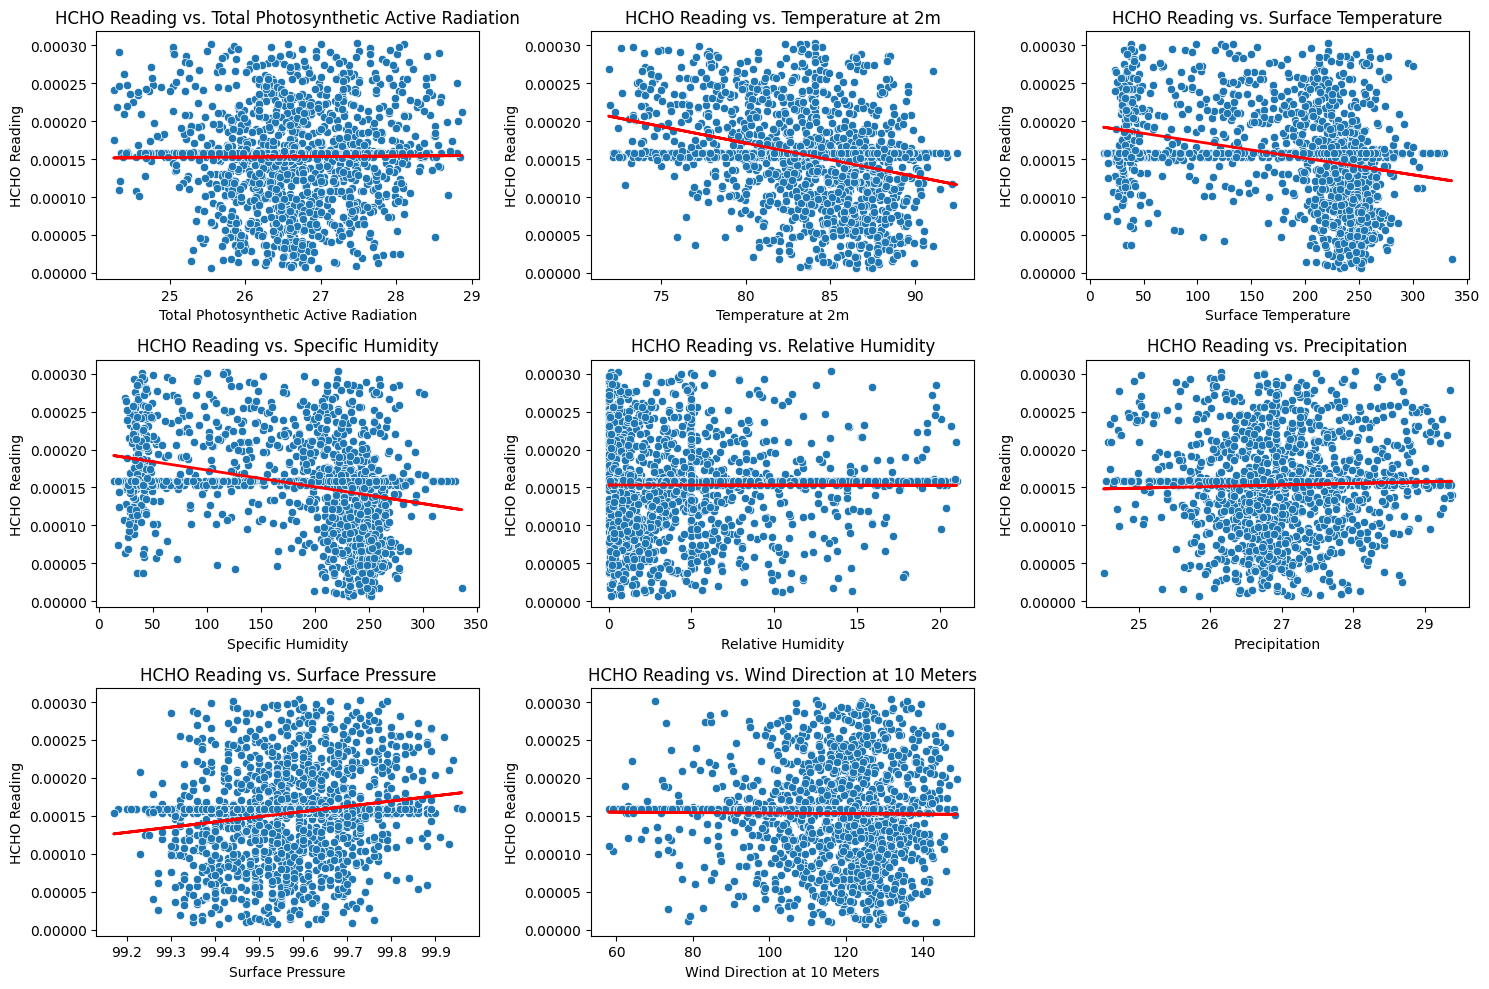

In [70]:
# Visualizing the relationship and trend betweeen the HCHO reading and the other weather factors in Colombo
model = LinearRegression()

# Specify custom names for the weather factors
custom_factor_names = {
    'PAR_TOT': 'Total Photosynthetic Active Radiation',
    'T2M': 'Temperature at 2m',
    'EST': 'Surface Temperature',
    'SH2M': 'Specific Humidity',
    'RH2M': 'Relative Humidity',
    'PRECIPITATION': 'Precipitation',
    'SP': 'Surface Pressure',
    'WD10M': 'Wind Direction at 10 Meters'
}

# Plot separate scatter plots with regression lines 
plt.figure(figsize=(15, 10))
for i, (factor, custom_name) in enumerate(custom_factor_names.items(), 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=colombo_merged_data, x=factor, y='HCHO Reading')
    
    # Fit linear regression model
    X = colombo_merged_data[[factor]]
    y = colombo_merged_data['HCHO Reading']
    model.fit(X, y)
    
    # Plot regression line
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    plt.title(f'HCHO Reading vs. {custom_name}')
    plt.xlabel(custom_name)
    plt.ylabel('HCHO Reading')
plt.tight_layout()
plt.show()


In [71]:
# Rename the columns
deniyaya_facts['Current Date'] = pd.to_datetime(deniyaya_facts[['YEAR', 'MONTH', 'DAY']].astype(str).agg('-'.join, axis=1))
deniyaya_facts.drop(columns=['YEAR', 'MONTH', 'DAY'], inplace=True)

In [72]:
# Merge data using current date
deniyaya_merged_data = pd.merge(hcho_deniyaya, deniyaya_facts, on='Current Date', how='inner')

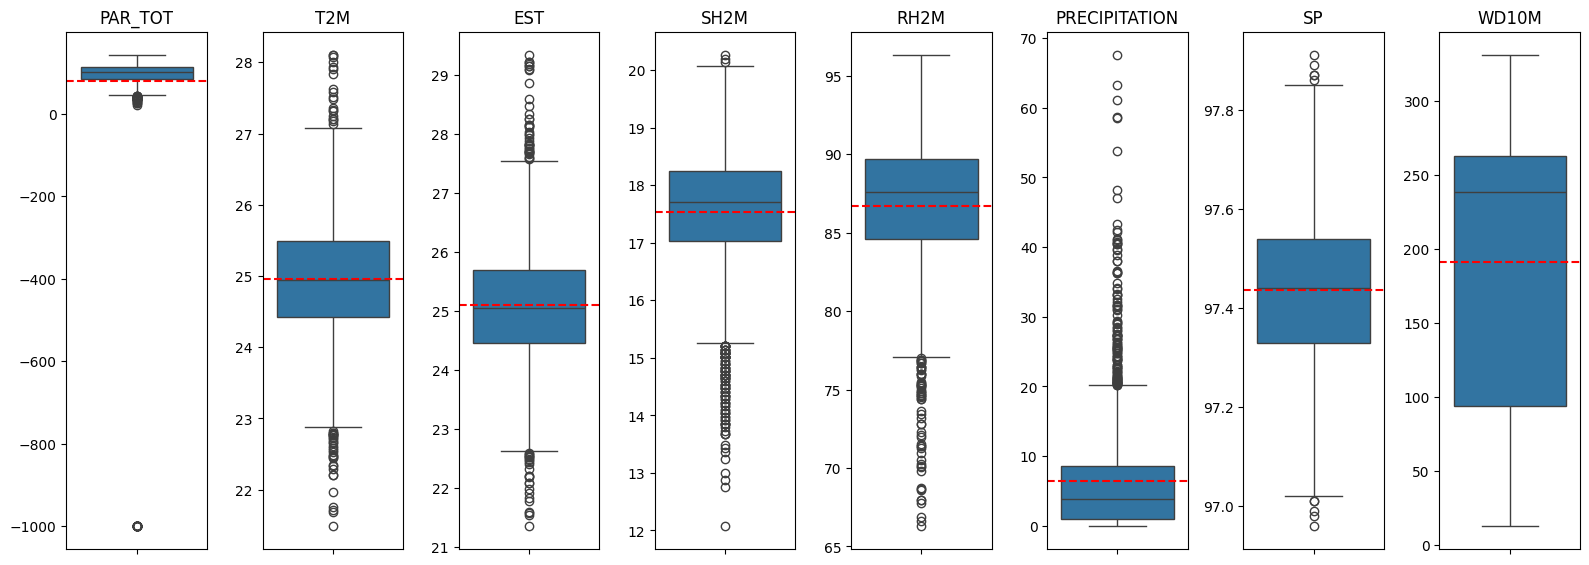

In [73]:
# Plot the bosplots for other weather factors
def plot_boxplots(dataset, variables):
    plt.figure(figsize=(8, 6))
    for j, variable in enumerate(variables):
        plt.subplot(1, len(variables), j+1)
        ax = sns.boxplot(y=dataset[variable])
        ax.set(ylabel='')  # Remove y-axis title
        mean = dataset[variable].mean()
        plt.axhline(mean, color='r', linestyle='--')
        plt.title(f'{variable}')
    plt.tight_layout(rect=[0, 0, 2, 0.96])
    plt.show()

plot_boxplots(deniyaya_merged_data, ['PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M'])

In [74]:
# Remove the outliers
deniyaya_merged_data = deniyaya_merged_data[deniyaya_merged_data['PAR_TOT'] > 0]

In [75]:
columns = ['PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP']

# Handle the other outliers
for col in columns:
    # Calculate 1st Quartile and 3rd quartile
    Q1 = deniyaya_merged_data[col].quantile(0.25)
    Q3 = deniyaya_merged_data[col].quantile(0.75)

    # Calculate IQR 
    IQR = Q3 - Q1

    # Lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    bounds = (deniyaya_merged_data[col] < lower_bound) | (deniyaya_merged_data[col] > upper_bound)

    # Replace outlier values with the mean of non-outlier values
    deniyaya_merged_data[col] = np.where(bounds, np.mean(deniyaya_merged_data[~bounds][col]), deniyaya_merged_data[col])


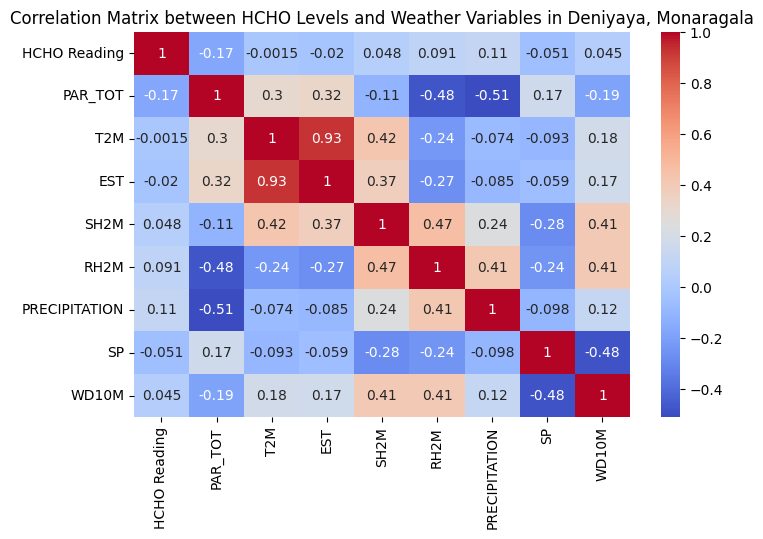

In [76]:
# Correlation matrix
correlation_matrix = deniyaya_merged_data[['HCHO Reading', 'PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and Weather Variables in Deniyaya, Monaragala')
plt.show()

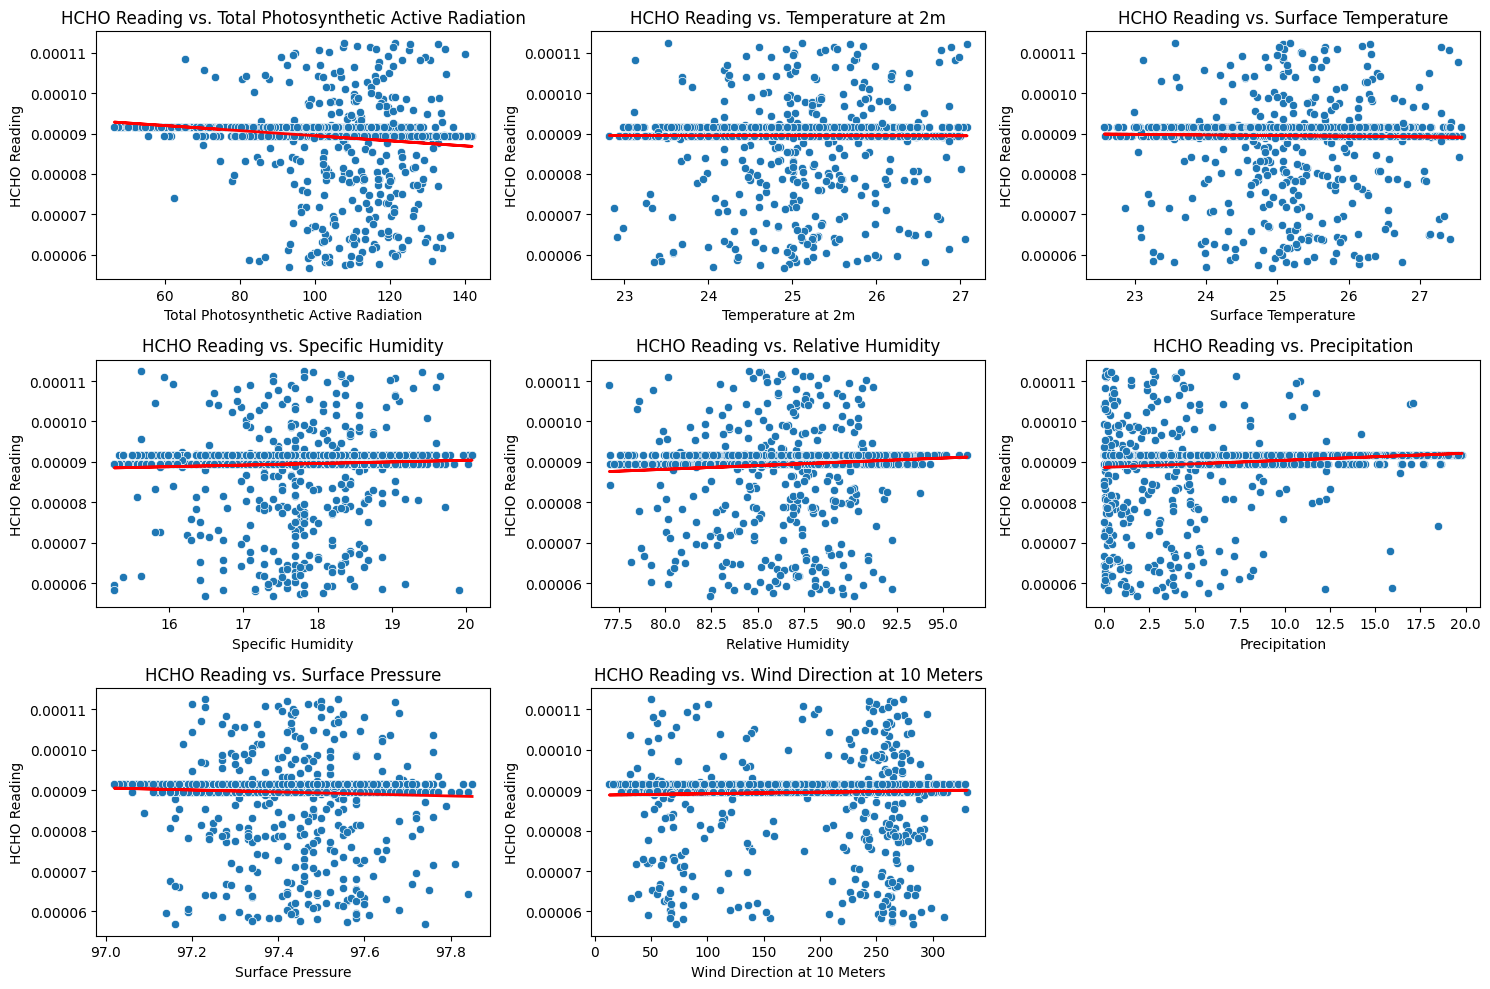

In [77]:
# Visualizing the relationship and trend betweeen the HCHO reading and the other weather factors in Deniyaya, Monaragala
model = LinearRegression()

# Specify custom names for the weather factors
custom_factor_names = {
    'PAR_TOT': 'Total Photosynthetic Active Radiation',
    'T2M': 'Temperature at 2m',
    'EST': 'Surface Temperature',
    'SH2M': 'Specific Humidity',
    'RH2M': 'Relative Humidity',
    'PRECIPITATION': 'Precipitation',
    'SP': 'Surface Pressure',
    'WD10M': 'Wind Direction at 10 Meters'
}

# Plot separate scatter plots with regression lines 
plt.figure(figsize=(15, 10))
for i, (factor, custom_name) in enumerate(custom_factor_names.items(), 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=deniyaya_merged_data, x=factor, y='HCHO Reading')
    
    # Fit linear regression model
    X = deniyaya_merged_data[[factor]]
    y = deniyaya_merged_data['HCHO Reading']
    model.fit(X, y)
    
    # Plot regression line
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    plt.title(f'HCHO Reading vs. {custom_name}')
    plt.xlabel(custom_name)
    plt.ylabel('HCHO Reading')
plt.tight_layout()
plt.show()


In [78]:
# Rename the columns
jaffna_facts['Current Date'] = pd.to_datetime(jaffna_facts[['YEAR', 'MONTH', 'DAY']].astype(str).agg('-'.join, axis=1))
jaffna_facts.drop(columns=['YEAR', 'MONTH', 'DAY'], inplace=True)

In [79]:
# Merge data using the current date
jaffna_merged_data = pd.merge(hcho_jaffna, jaffna_facts, on='Current Date', how='inner')

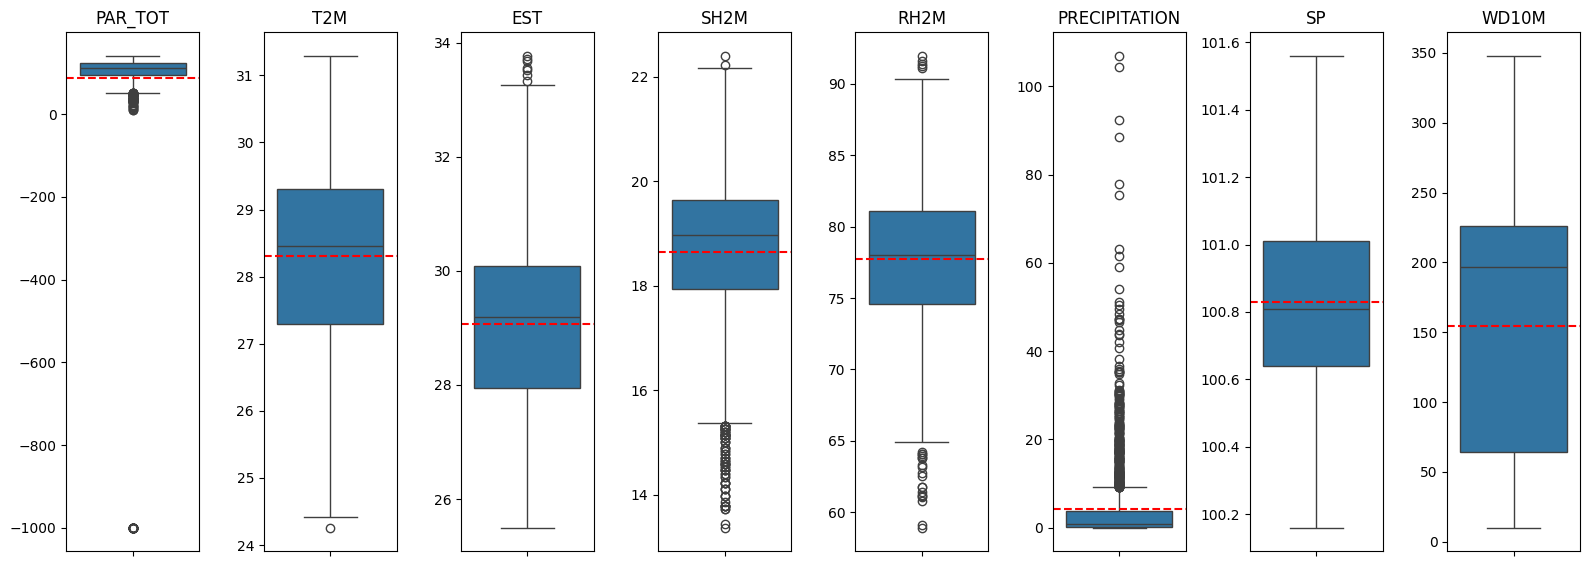

In [80]:
# Plot boxplots
def plot_boxplots(dataset, variables):
    plt.figure(figsize=(8, 6))
    for j, variable in enumerate(variables):
        plt.subplot(1, len(variables), j+1)
        ax = sns.boxplot(y=dataset[variable])
        ax.set(ylabel='')  # Remove y-axis title
        mean = dataset[variable].mean()
        plt.axhline(mean, color='r', linestyle='--')
        plt.title(f'{variable}')
    plt.tight_layout(rect=[0, 0, 2, 0.96])
    plt.show()

plot_boxplots(jaffna_merged_data, ['PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M'])

In [81]:
# Remove outliers
jaffna_merged_data = jaffna_merged_data[jaffna_merged_data['PAR_TOT'] > 0]

In [82]:
# Handle the other outliers
columns = ['PAR_TOT', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION']

for col in columns:
    # Calculate 1st Quartile and 3rd quartile
    Q1 = jaffna_merged_data[col].quantile(0.25)
    Q3 = jaffna_merged_data[col].quantile(0.75)

    # Calculate IQR 
    IQR = Q3 - Q1

    # Lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    bounds = (jaffna_merged_data[col] < lower_bound) | (jaffna_merged_data[col] > upper_bound)

    # Replace outlier values with the mean of non-outlier values
    jaffna_merged_data[col] = np.where(bounds, np.mean(jaffna_merged_data[~bounds][col]), jaffna_merged_data[col])


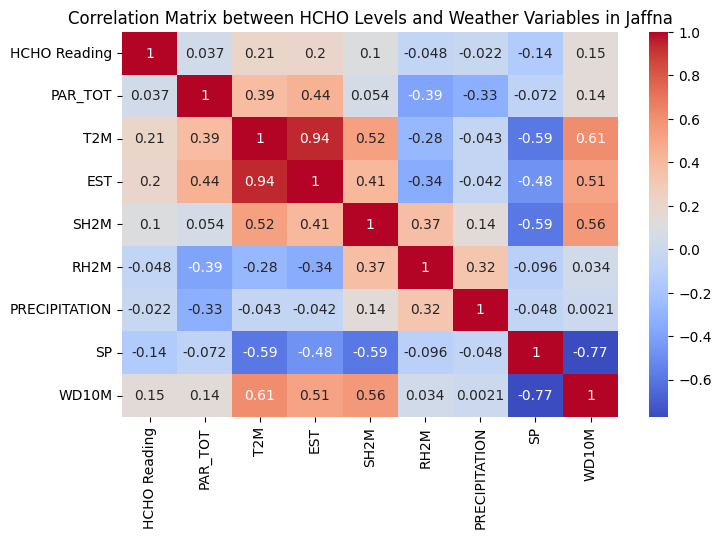

In [83]:
# Correlation matrix
correlation_matrix = jaffna_merged_data[['HCHO Reading', 'PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and Weather Variables in Jaffna')
plt.show()

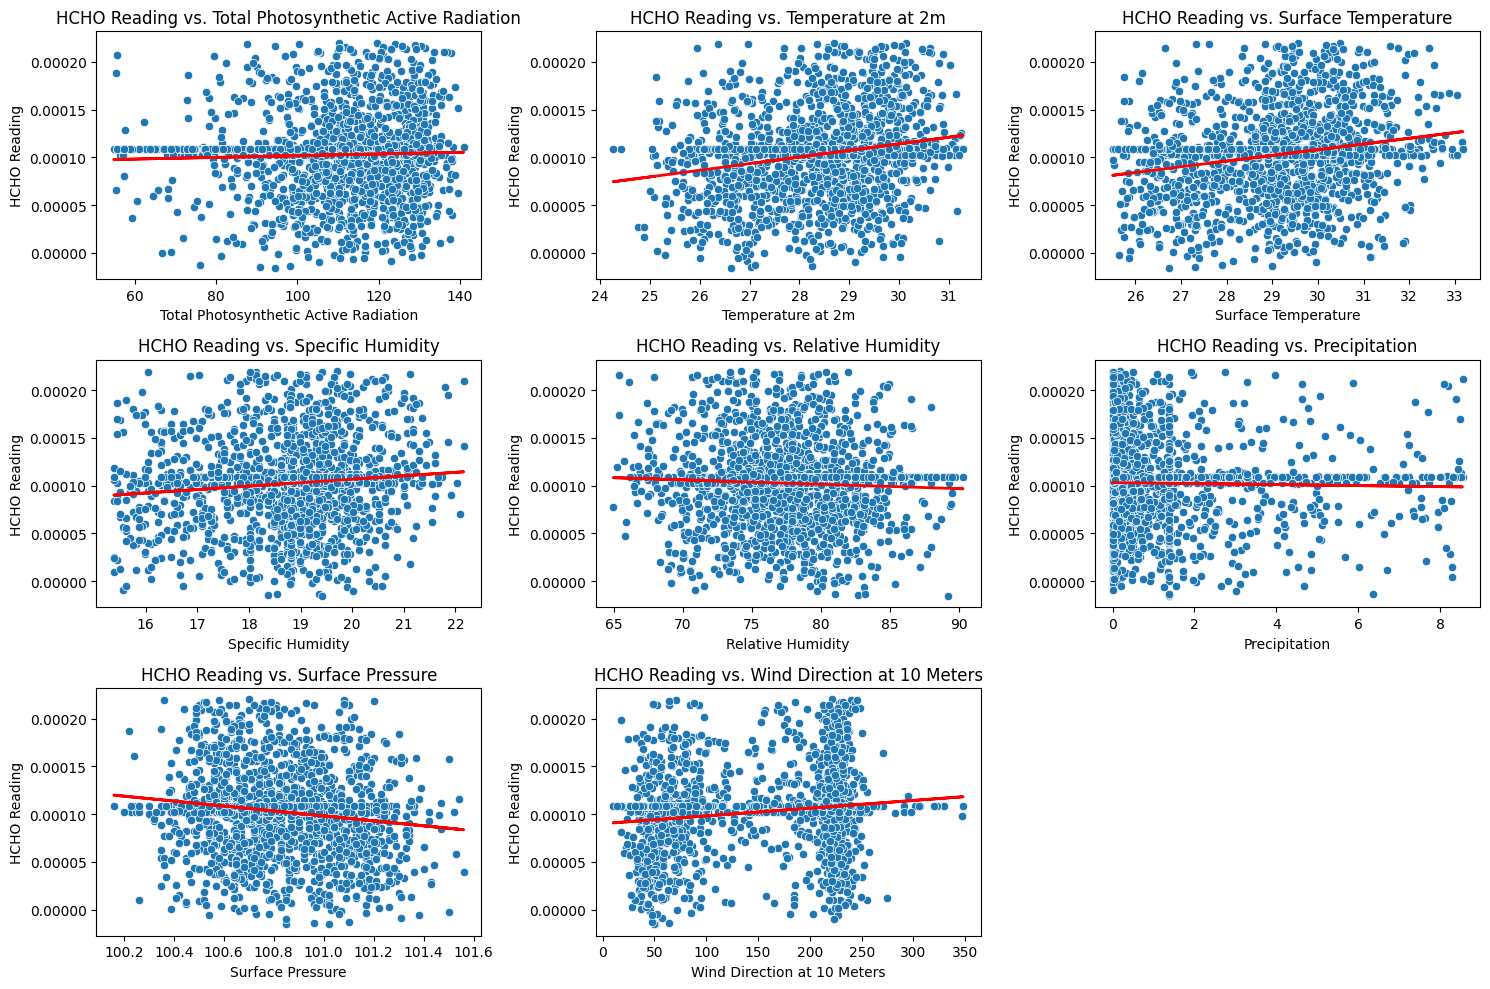

In [84]:
# Visualizing the relationship and trend betweeen the HCHO reading and the other weather factors in Jaffna
model = LinearRegression()

# Specify custom names for the weather factors
custom_factor_names = {
    'PAR_TOT': 'Total Photosynthetic Active Radiation',
    'T2M': 'Temperature at 2m',
    'EST': 'Surface Temperature',
    'SH2M': 'Specific Humidity',
    'RH2M': 'Relative Humidity',
    'PRECIPITATION': 'Precipitation',
    'SP': 'Surface Pressure',
    'WD10M': 'Wind Direction at 10 Meters'
}

# Plot separate scatter plots with regression lines 
plt.figure(figsize=(15, 10))
for i, (factor, custom_name) in enumerate(custom_factor_names.items(), 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=jaffna_merged_data, x=factor, y='HCHO Reading')
    
    # Fit linear regression model
    X = jaffna_merged_data[[factor]]
    y = jaffna_merged_data['HCHO Reading']
    model.fit(X, y)
    
    # Plot regression line
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    
    plt.title(f'HCHO Reading vs. {custom_name}')
    plt.xlabel(custom_name)
    plt.ylabel('HCHO Reading')
plt.tight_layout()
plt.show()


In [85]:
# Rename the columns
kandy_facts['Current Date'] = pd.to_datetime(kandy_facts[['YEAR', 'MONTH', 'DAY']].astype(str).agg('-'.join, axis=1))
kandy_facts.drop(columns=['YEAR', 'MONTH', 'DAY'], inplace=True)

In [86]:
# Merge the data
kandy_merged_data = pd.merge(hcho_kandy, kandy_facts, on='Current Date', how='inner')

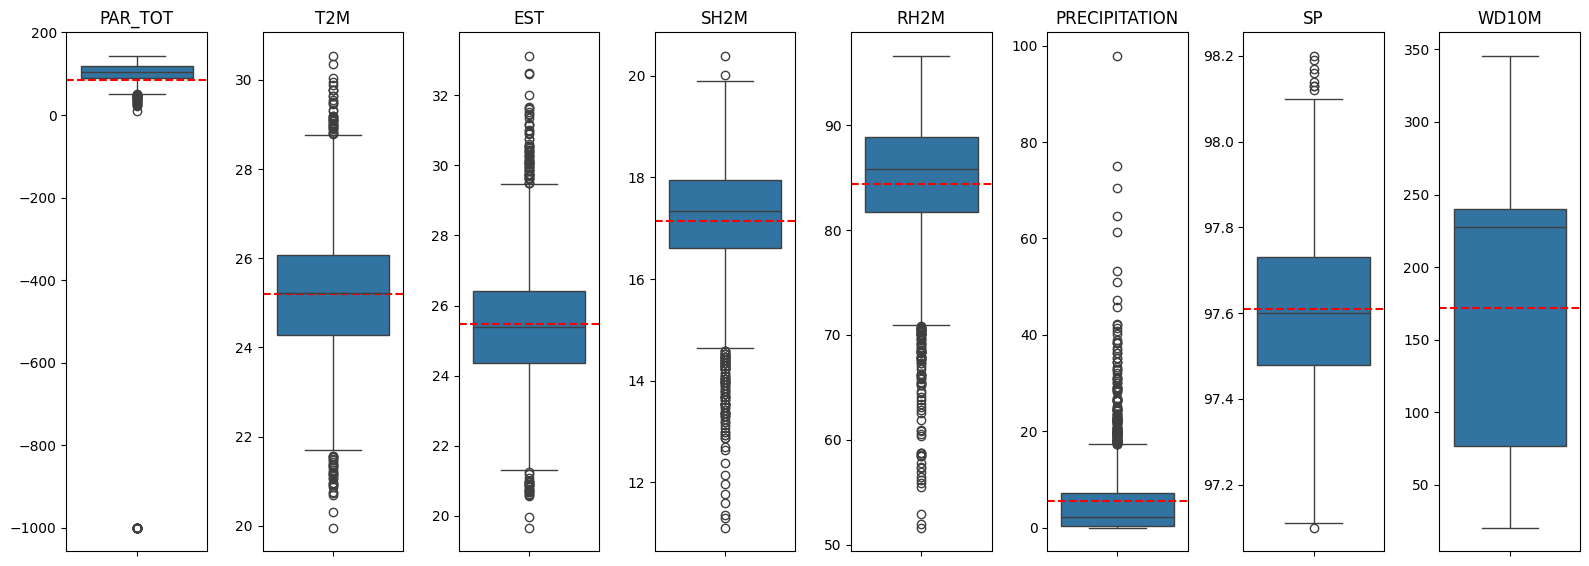

In [87]:
# Plot the bosxplots
def plot_boxplots(dataset, variables):
    plt.figure(figsize=(8, 6))
    for j, variable in enumerate(variables):
        plt.subplot(1, len(variables), j+1)
        ax = sns.boxplot(y=dataset[variable])
        ax.set(ylabel='')  # Remove y-axis title
        mean = dataset[variable].mean()
        plt.axhline(mean, color='r', linestyle='--')
        plt.title(f'{variable}')
    plt.tight_layout(rect=[0, 0, 2, 0.96])
    plt.show()

plot_boxplots(kandy_merged_data, ['PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M'])

In [88]:
# Remove the outliers
kandy_merged_data = kandy_merged_data[kandy_merged_data['PAR_TOT'] > 0]

In [89]:
# Handle the other outliers
columns = ['PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP']

for col in columns:
    # Calculate 1st Quartile and 3rd quartile
    Q1 = kandy_merged_data[col].quantile(0.25)
    Q3 = kandy_merged_data[col].quantile(0.75)

    # Calculate IQR 
    IQR = Q3 - Q1

    # Lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    bounds = (kandy_merged_data[col] < lower_bound) | (kandy_merged_data[col] > upper_bound)

    # Replace outlier values with the mean of non-outlier values
    kandy_merged_data[col] = np.where(bounds, np.mean(kandy_merged_data[~bounds][col]), kandy_merged_data[col])


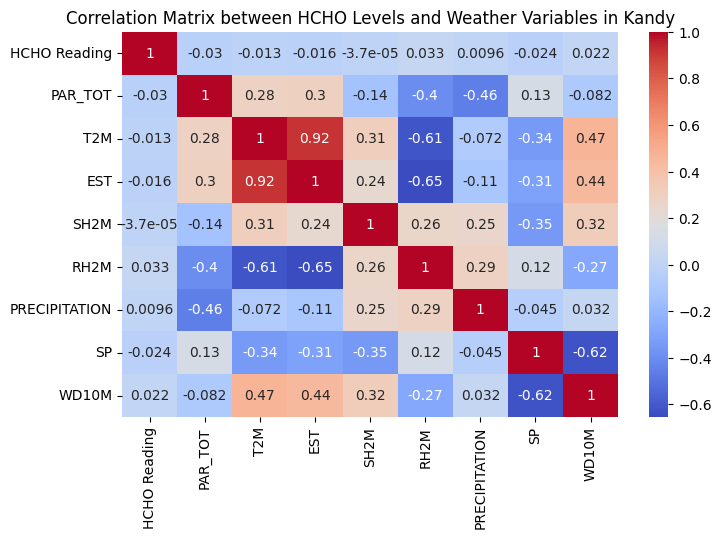

In [90]:
# Correlation matrix
correlation_matrix = kandy_merged_data[['HCHO Reading', 'PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and Weather Variables in Kandy')
plt.show()

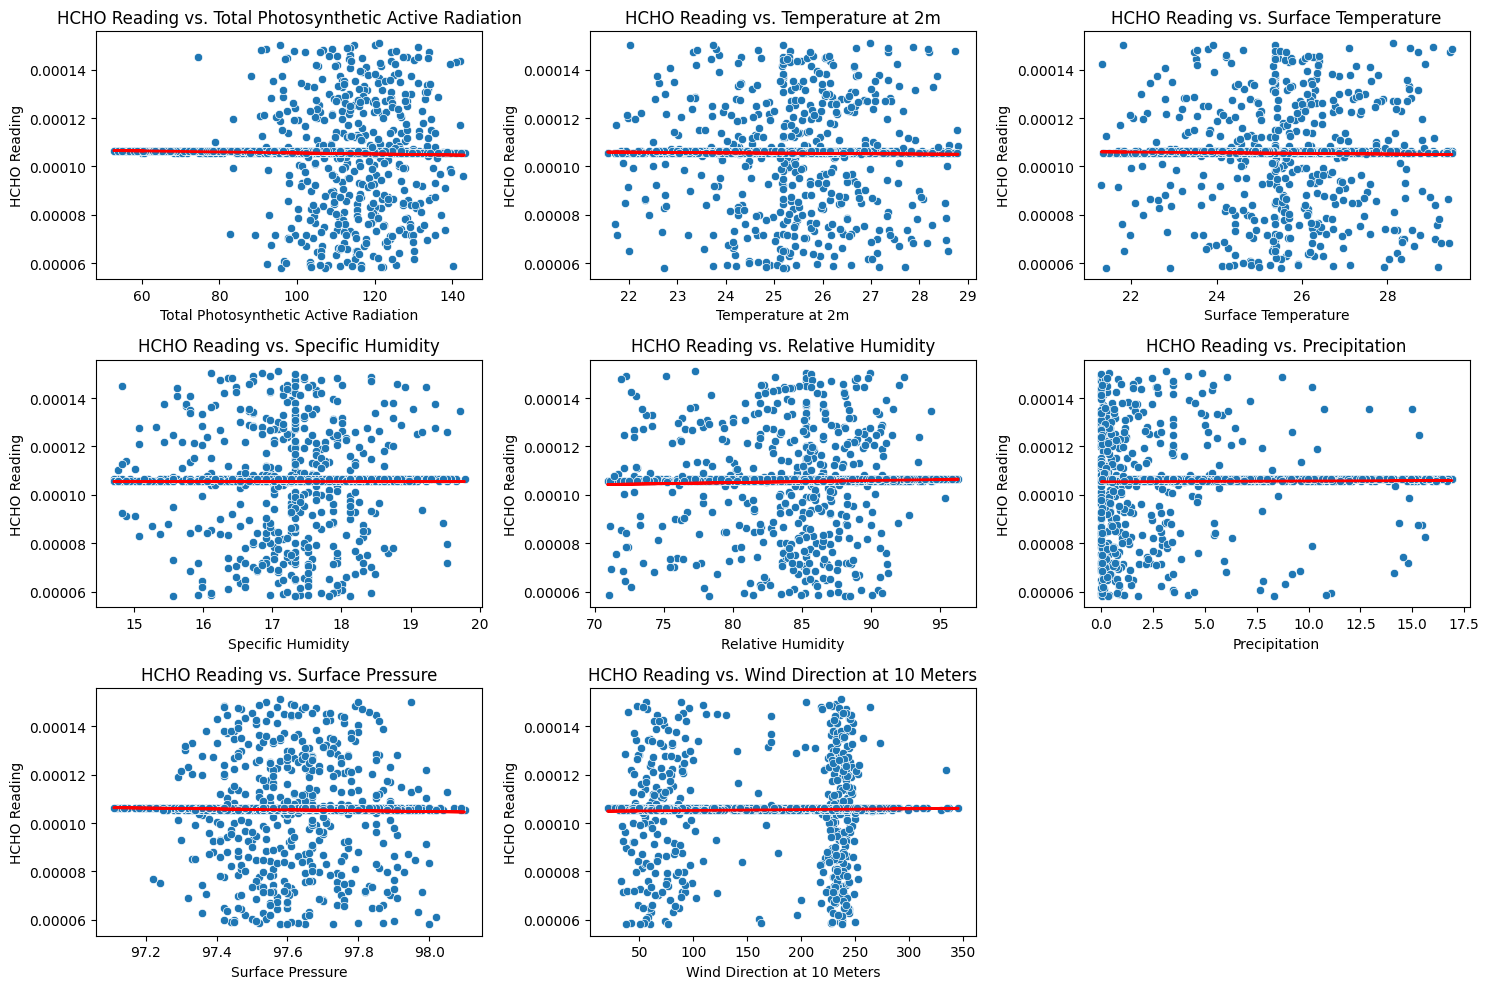

In [91]:
# Visualizing the relationship and trend betweeen the HCHO reading and the other weather factors in Kandy
model = LinearRegression()

# Specify custom names for the weather factors
custom_factor_names = {
    'PAR_TOT': 'Total Photosynthetic Active Radiation',
    'T2M': 'Temperature at 2m',
    'EST': 'Surface Temperature',
    'SH2M': 'Specific Humidity',
    'RH2M': 'Relative Humidity',
    'PRECIPITATION': 'Precipitation',
    'SP': 'Surface Pressure',
    'WD10M': 'Wind Direction at 10 Meters'
}

# Plot separate scatter plots with regression lines for HCHO reading versus each weather factor
plt.figure(figsize=(15, 10))
for i, (factor, custom_name) in enumerate(custom_factor_names.items(), 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=kandy_merged_data, x=factor, y='HCHO Reading')
    
    # Fit linear regression model
    X = kandy_merged_data[[factor]]
    y = kandy_merged_data['HCHO Reading']
    model.fit(X, y)
    
    # Plot regression line
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    
    plt.title(f'HCHO Reading vs. {custom_name}')
    plt.xlabel(custom_name)
    plt.ylabel('HCHO Reading')
plt.tight_layout()
plt.show()


In [92]:
# Rename the columns
kurunegala_facts['Current Date'] = pd.to_datetime(kurunegala_facts[['YEAR', 'MONTH', 'DAY']].astype(str).agg('-'.join, axis=1))
kurunegala_facts.drop(columns=['YEAR', 'MONTH', 'DAY'], inplace=True)

In [93]:
# Merge data using current date
kurunegala_merged_data = pd.merge(hcho_kurunegala, kurunegala_facts, on='Current Date', how='inner')

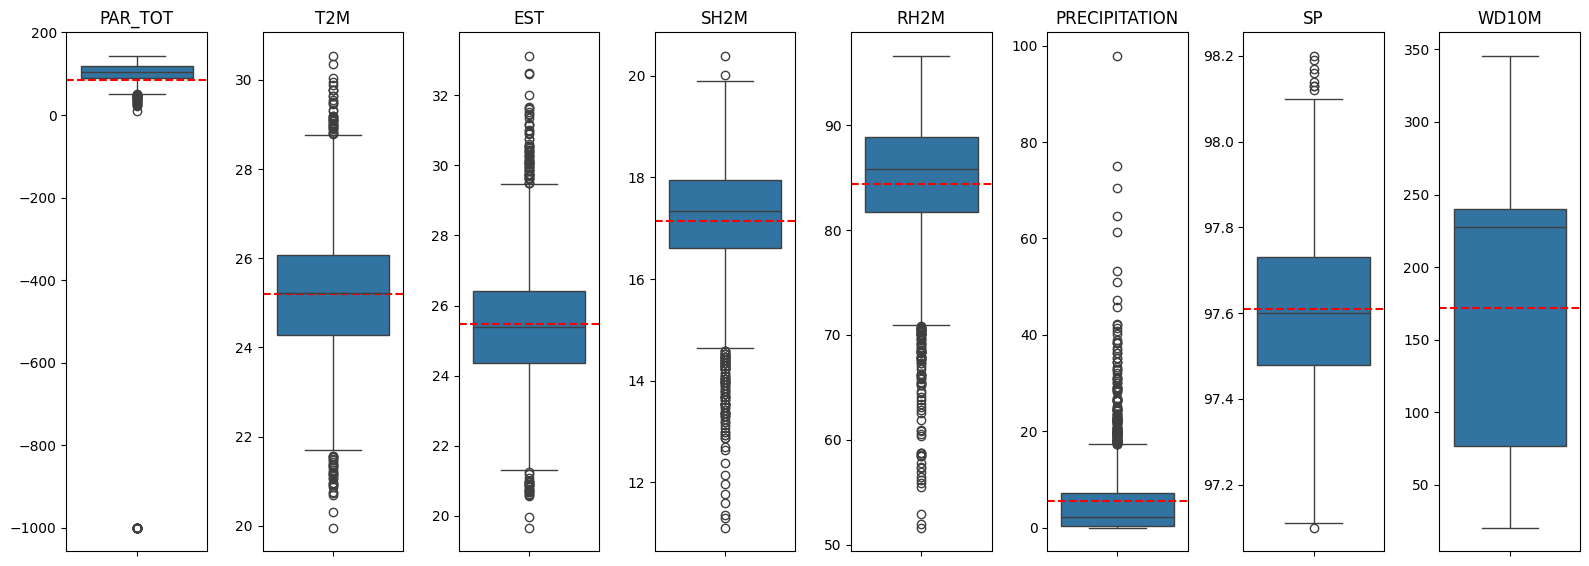

In [94]:
# Plot the boxplots
def plot_boxplots(dataset, variables):
    plt.figure(figsize=(8, 6))
    for j, variable in enumerate(variables):
        plt.subplot(1, len(variables), j+1)
        ax = sns.boxplot(y=dataset[variable])
        ax.set(ylabel='')  # Remove y-axis title
        mean = dataset[variable].mean()
        plt.axhline(mean, color='r', linestyle='--')
        plt.title(f'{variable}')
    plt.tight_layout(rect=[0, 0, 2, 0.96])
    plt.show()

plot_boxplots(kurunegala_merged_data, ['PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M'])

In [95]:
# Remove the outliers
kurunegala_merged_data = kurunegala_merged_data[kurunegala_merged_data['PAR_TOT'] > 0]

In [96]:
# Handle the other outliers
columns = ['PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP']

for col in columns:
    # Calculate 1st Quartile and 3rd quartile
    Q1 = kurunegala_merged_data[col].quantile(0.25)
    Q3 = kurunegala_merged_data[col].quantile(0.75)

    # Calculate IQR 
    IQR = Q3 - Q1

    # Lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    bounds = (kurunegala_merged_data[col] < lower_bound) | (kurunegala_merged_data[col] > upper_bound)

    # Replace outlier values with the mean of non-outlier values
    kurunegala_merged_data[col] = np.where(bounds, np.mean(kurunegala_merged_data[~bounds][col]), kurunegala_merged_data[col])


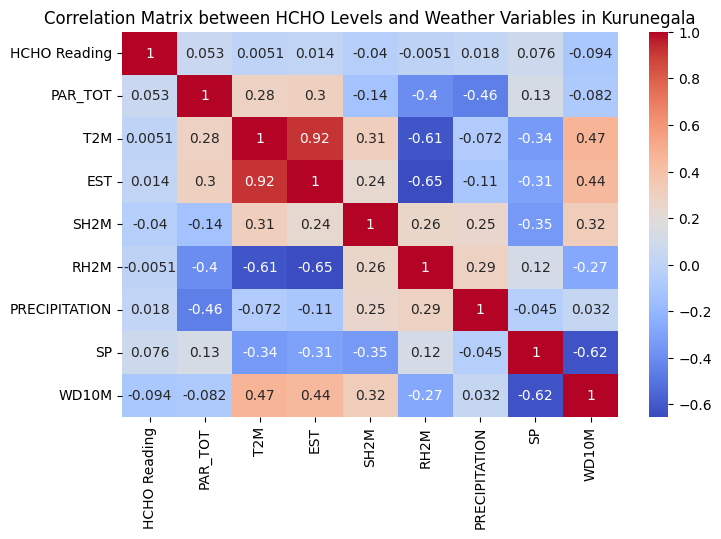

In [97]:
# Correlation matrix
correlation_matrix = kurunegala_merged_data[['HCHO Reading', 'PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and Weather Variables in Kurunegala')
plt.show()

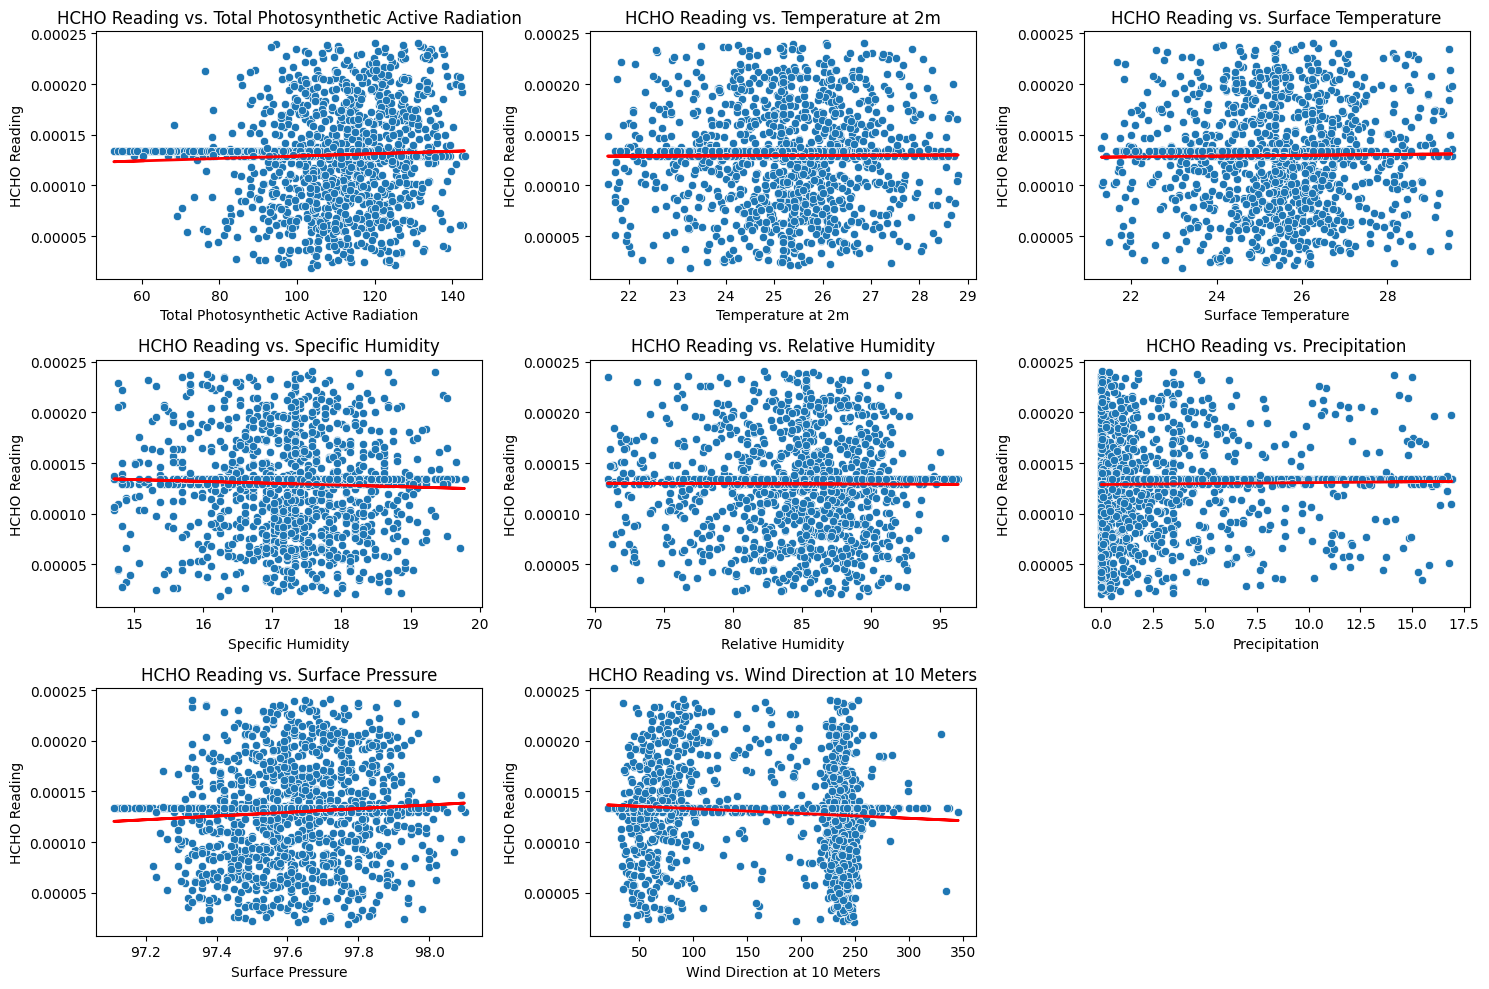

In [98]:
# Visualizing the relationship and trend betweeen the HCHO reading and the other weather factors in Colombo
model = LinearRegression()

# Specify custom names for the weather factors
custom_factor_names = {
    'PAR_TOT': 'Total Photosynthetic Active Radiation',
    'T2M': 'Temperature at 2m',
    'EST': 'Surface Temperature',
    'SH2M': 'Specific Humidity',
    'RH2M': 'Relative Humidity',
    'PRECIPITATION': 'Precipitation',
    'SP': 'Surface Pressure',
    'WD10M': 'Wind Direction at 10 Meters'
}

# Plot separate scatter plots with regression lines 
plt.figure(figsize=(15, 10))
for i, (factor, custom_name) in enumerate(custom_factor_names.items(), 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=kurunegala_merged_data, x=factor, y='HCHO Reading')
    
    # Fit linear regression model
    X = kurunegala_merged_data[[factor]]
    y = kurunegala_merged_data['HCHO Reading']
    model.fit(X, y)
    
    # Plot regression line
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    
    plt.title(f'HCHO Reading vs. {custom_name}')
    plt.xlabel(custom_name)
    plt.ylabel('HCHO Reading')
plt.tight_layout()
plt.show()


In [99]:
# Create the final dataset
final_dataset = pd.concat([nuwaraeliya_merged_data, kurunegala_merged_data, kandy_merged_data, jaffna_merged_data, deniyaya_merged_data, colombo_merged_data, bibile_merged_data])
final_dataset = final_dataset.reset_index(drop=True)

In [100]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12572 entries, 0 to 12571
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HCHO Reading   12572 non-null  float64       
 1   Location       12572 non-null  object        
 2   Current Date   12572 non-null  datetime64[ns]
 3   Next Date      12572 non-null  datetime64[ns]
 4   PAR_TOT        12572 non-null  float64       
 5   T2M            12572 non-null  float64       
 6   EST            12572 non-null  float64       
 7   SH2M           12572 non-null  float64       
 8   RH2M           12572 non-null  float64       
 9   PRECIPITATION  12572 non-null  float64       
 10  SP             12572 non-null  float64       
 11  WD10M          12572 non-null  float64       
dtypes: datetime64[ns](2), float64(9), object(1)
memory usage: 1.2+ MB


## Data Visualization

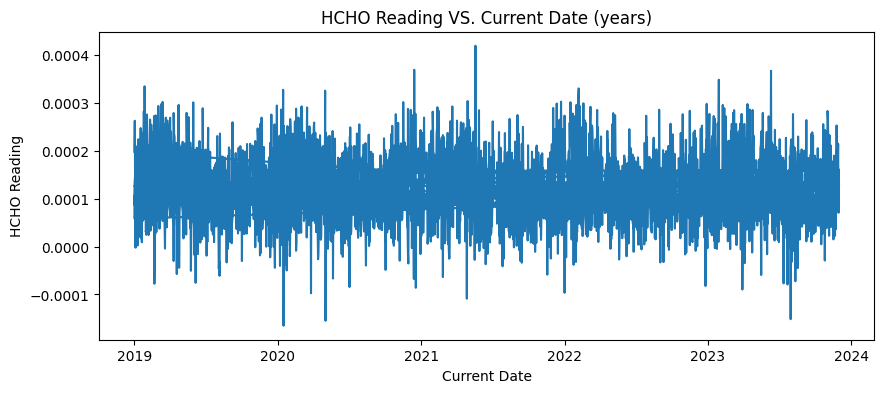

In [101]:
plt.figure(figsize=(10, 4))
plt.xlabel("Current Date")
plt.ylabel("HCHO Reading")
plt.plot(final_dataset['Current Date'], final_dataset['HCHO Reading'])
plt.title('HCHO Reading VS. Current Date (years)')
plt.show()

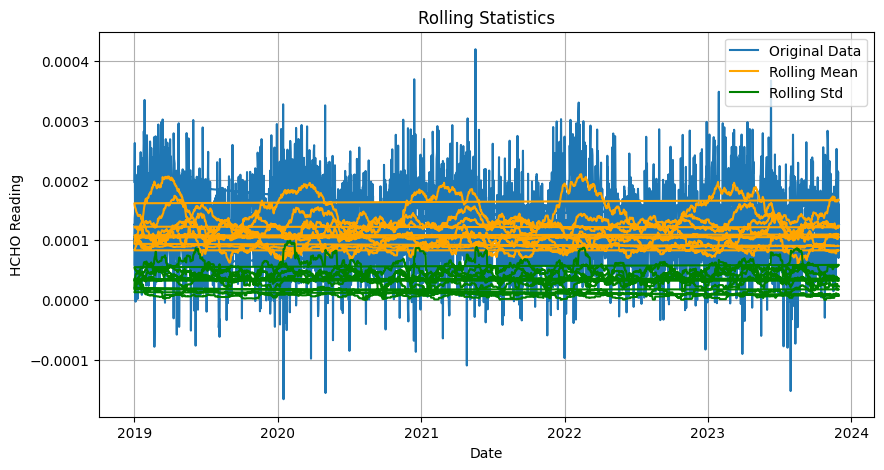

In [102]:
# Calculate rolling mean and standard deviation
rolling_mean = final_dataset['HCHO Reading'].rolling(window=30).mean()
rolling_std = final_dataset['HCHO Reading'].rolling(window=30).std()
    
plt.figure(figsize=(10, 5))
plt.plot(final_dataset['Current Date'], final_dataset['HCHO Reading'], label='Original Data')
plt.plot(final_dataset['Current Date'], rolling_mean, label='Rolling Mean', color='orange')
plt.plot(final_dataset['Current Date'], rolling_std, label='Rolling Std', color='green')
plt.title(f'Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()


In [103]:
final_dataset['Location'].unique()

array(['NUWARA ELIYA', 'KURUNEGALA', 'KANDY', 'JAFFNA',
       'DENIYAYA, MATARA', 'COLOMBO', 'BIBILE, MONARAGALA'], dtype=object)

In [104]:
# Add more information to the dataset (latitude,longitude,elevation)
location_info = {
    "NUWARA ELIYA": {"latitude": 6.9497, "longitude": 80.7891, "elevation": 681.44},
    "KURUNEGALA": {"latitude": 7.4818, "longitude": 80.3609, "elevation": 296.6},
    "KANDY": {"latitude": 7.2906, "longitude": 80.6337, "elevation": 296.6},
    "JAFFNA": {"latitude": 9.6615, "longitude": 80.0255,"elevation": 6.95},
    "DENIYAYA, MATARA": {"latitude": 6.3425, "longitude": 80.5597, "elevation": 316.87},
    "COLOMBO": {"latitude": 6.9271, "longitude": 79.8612, "elevation": 123.66},
    "BIBILE, MONARAGALA": {"latitude": 7.1624, "longitude": 81.2216, "elevation": 399.54},
}

# Define functions to extract latitude, longitude and elevation based on location
def get_latitude(location):
    return location_info[location]["latitude"]

def get_longitude(location):
    return location_info[location]["longitude"]

def get_elevation(location):
    return location_info[location]["elevation"]

# Create new columns for latitude, longitude and Elevation
final_dataset["Latitude"] = final_dataset["Location"].apply(get_latitude)
final_dataset["Longitude"] = final_dataset["Location"].apply(get_longitude)
final_dataset["Elevation"] = final_dataset["Location"].apply(get_elevation)

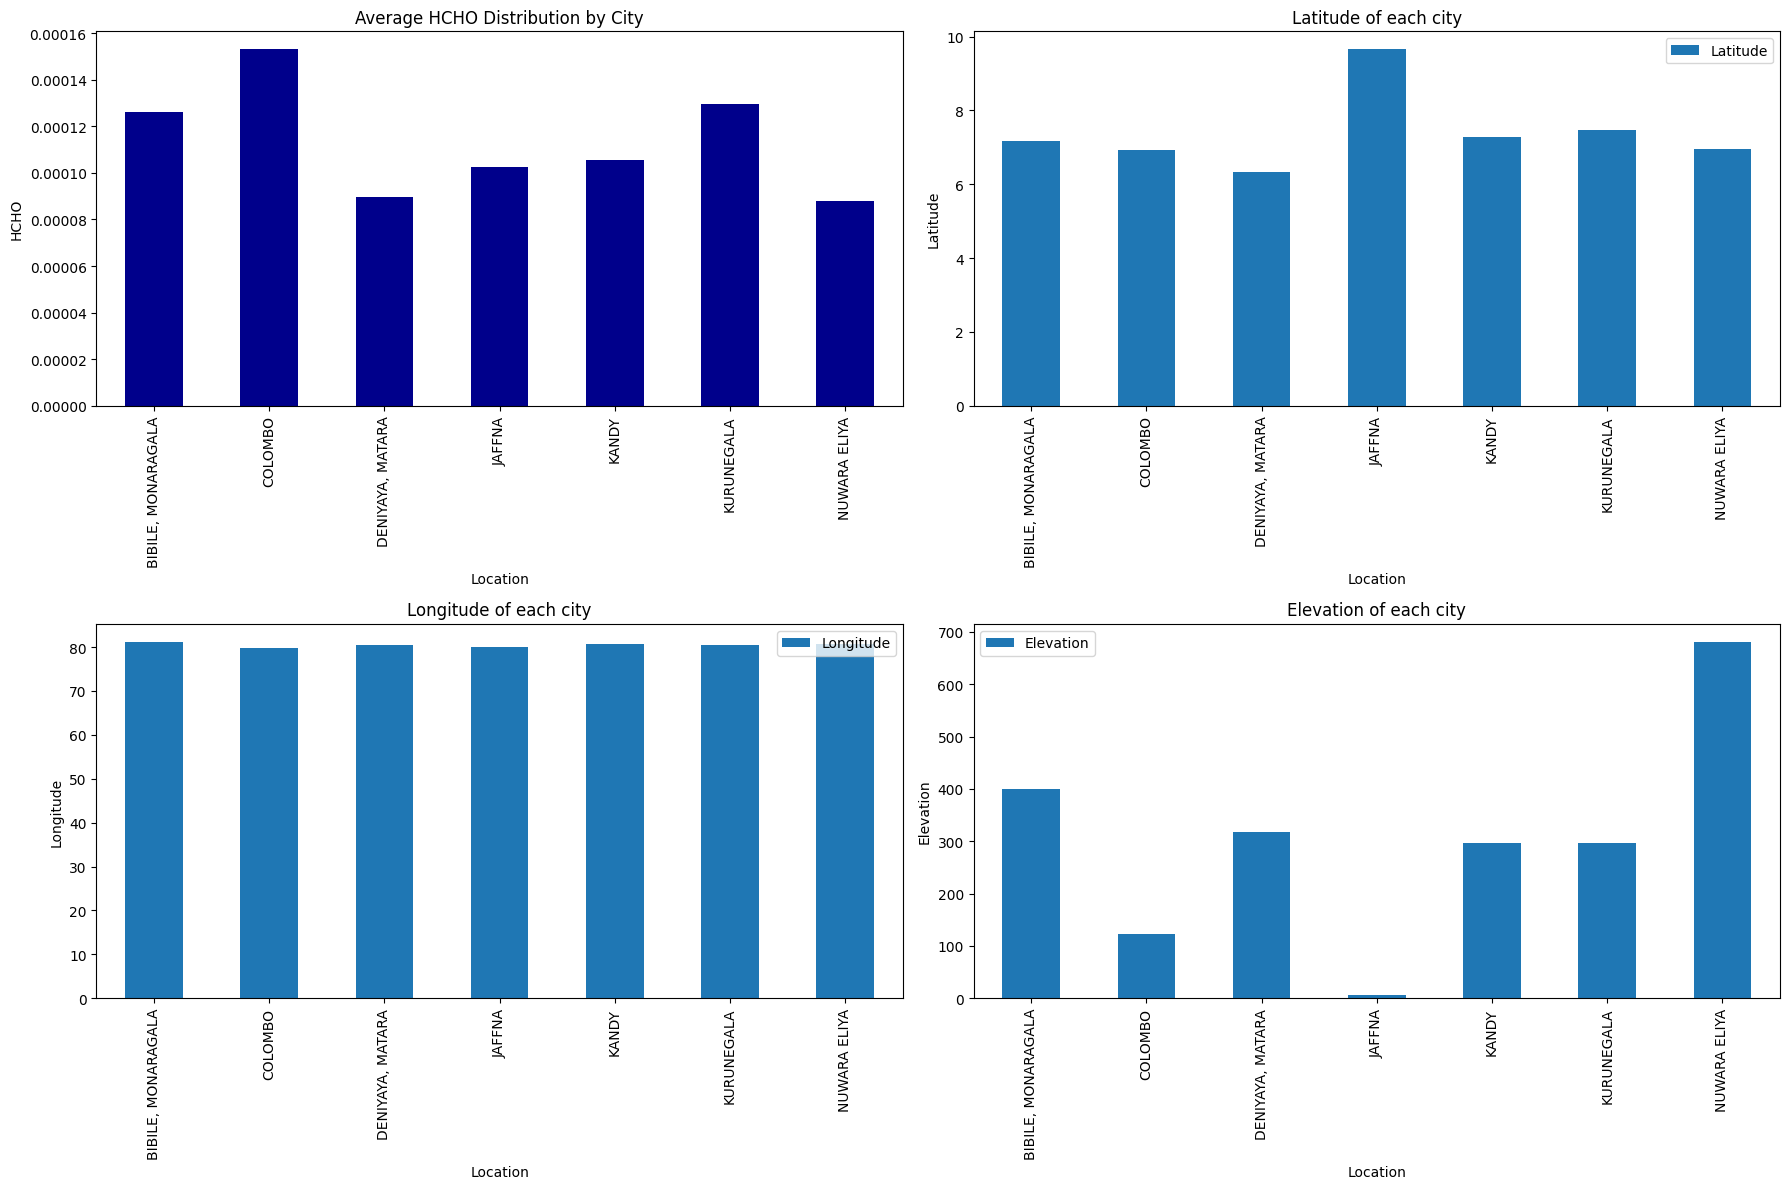

In [105]:
# Group the data by City and calculate the mean
grouped = final_dataset.groupby('Location').mean()

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# HCHO distribution
grouped['HCHO Reading'].plot(kind='bar', ax=ax[0][0], color='darkBlue')
ax[0][0].set_title('Average HCHO Distribution by City')
ax[0][0].set_ylabel('HCHO')

# Latitude
grouped[['Latitude']].plot(kind='bar', ax=ax[0][1])
ax[0][1].set_title('Latitude of each city')
ax[0][1].set_ylabel('Latitude')

# Longitude
grouped[['Longitude']].plot(kind='bar', ax=ax[1][0])
ax[1][0].set_title('Longitude of each city')
ax[1][0].set_ylabel('Longitude')

# Elevation
grouped[['Elevation']].plot(kind='bar', ax=ax[1][1])
ax[1][1].set_title('Elevation of each city')
ax[1][1].set_ylabel('Elevation')

plt.tight_layout()
plt.show()


In [106]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12572 entries, 0 to 12571
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HCHO Reading   12572 non-null  float64       
 1   Location       12572 non-null  object        
 2   Current Date   12572 non-null  datetime64[ns]
 3   Next Date      12572 non-null  datetime64[ns]
 4   PAR_TOT        12572 non-null  float64       
 5   T2M            12572 non-null  float64       
 6   EST            12572 non-null  float64       
 7   SH2M           12572 non-null  float64       
 8   RH2M           12572 non-null  float64       
 9   PRECIPITATION  12572 non-null  float64       
 10  SP             12572 non-null  float64       
 11  WD10M          12572 non-null  float64       
 12  Latitude       12572 non-null  float64       
 13  Longitude      12572 non-null  float64       
 14  Elevation      12572 non-null  float64       
dtypes: datetime64[ns](2

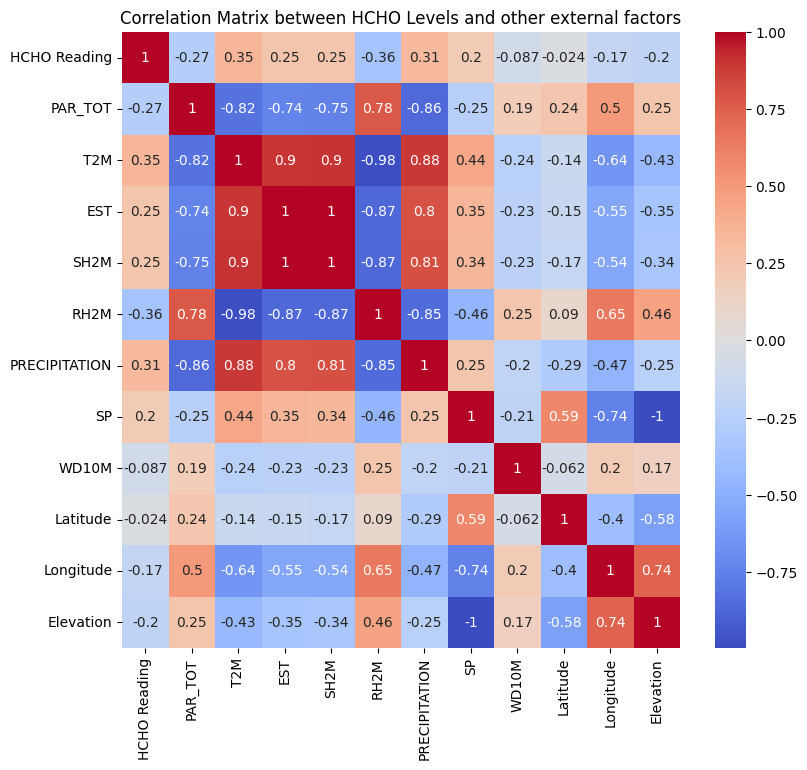

In [107]:
correlation_matrix = final_dataset[['HCHO Reading', 'PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'SP', 'WD10M', 'Latitude', 'Longitude', 'Elevation']].corr()

# Visualize correlation matrix
plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and other external factors')
plt.show()

In [108]:
# Reuce multicollinearity
final_dataset = final_dataset.drop(columns='SP')

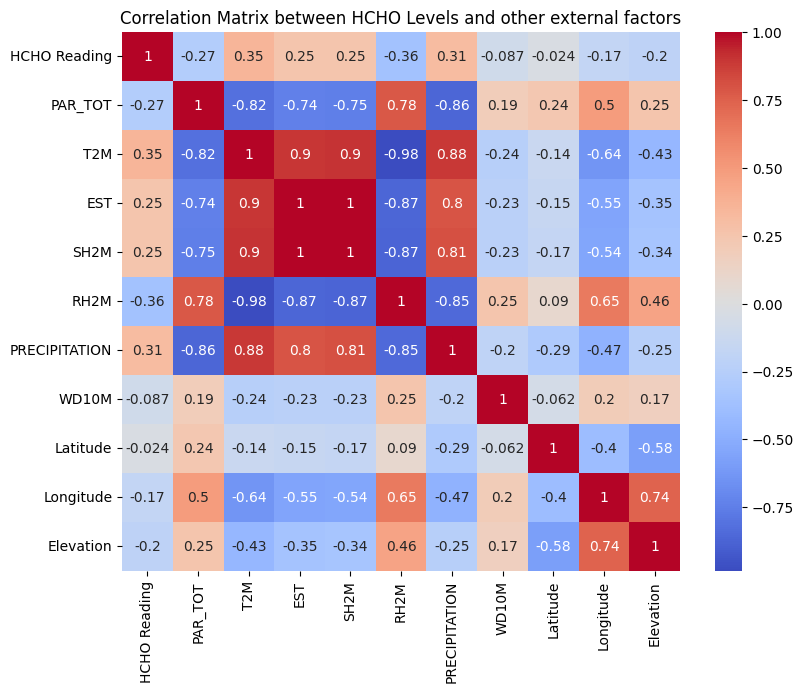

In [109]:
correlation_matrix = final_dataset[['HCHO Reading', 'PAR_TOT', 'T2M', 'EST', 'SH2M', 'RH2M', 'PRECIPITATION', 'WD10M', 'Latitude', 'Longitude', 'Elevation']].corr()

# Visualize correlation matrix
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and other external factors')
plt.show()

In [110]:
# Reduce multicollinearity
final_dataset = final_dataset.drop(columns='EST')

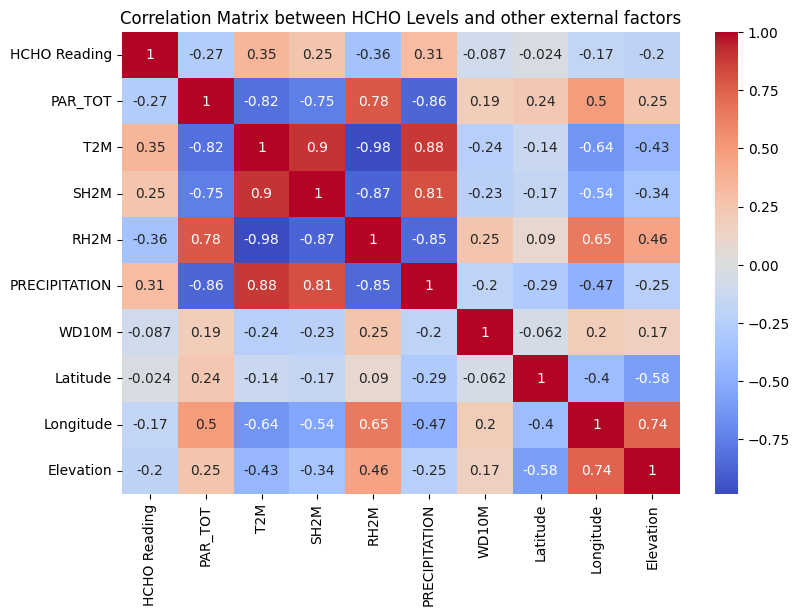

In [111]:
correlation_matrix = final_dataset[['HCHO Reading', 'PAR_TOT', 'T2M', 'SH2M', 'RH2M', 'PRECIPITATION', 'WD10M', 'Latitude', 'Longitude', 'Elevation']].corr()

# Visualize correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and other external factors')
plt.show()

In [112]:
# Reuce multicollinearity
final_dataset = final_dataset.drop(columns='SH2M')

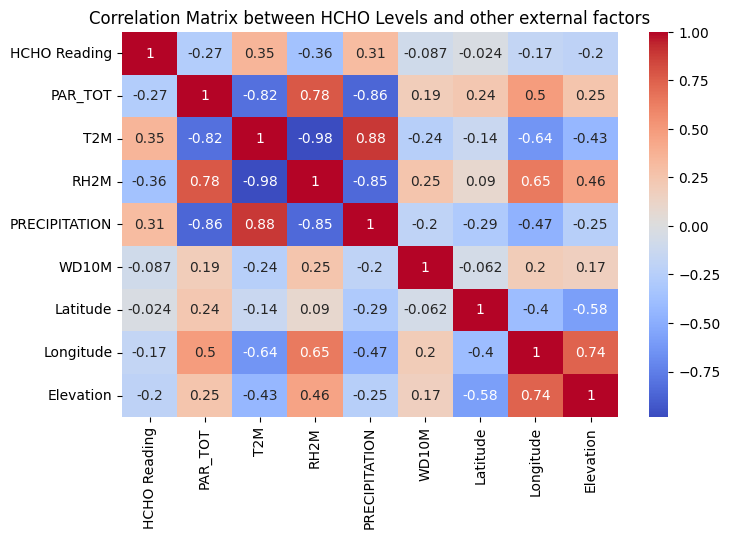

In [113]:
correlation_matrix = final_dataset[['HCHO Reading', 'PAR_TOT', 'T2M', 'RH2M', 'PRECIPITATION', 'WD10M', 'Latitude', 'Longitude', 'Elevation']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and other external factors')
plt.show()

In [114]:
# Reduce multicollinearity
final_dataset = final_dataset.drop(columns='T2M')

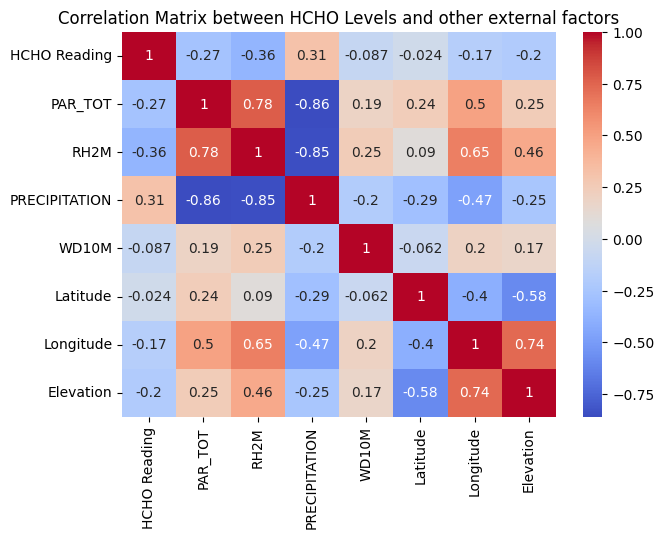

In [115]:
correlation_matrix = final_dataset[['HCHO Reading', 'PAR_TOT', 'RH2M', 'PRECIPITATION', 'WD10M', 'Latitude', 'Longitude', 'Elevation']].corr()

# Visualize correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and other external factors')
plt.show()

In [116]:
# Reduce multicollinearity
final_dataset = final_dataset.drop(columns='PAR_TOT')

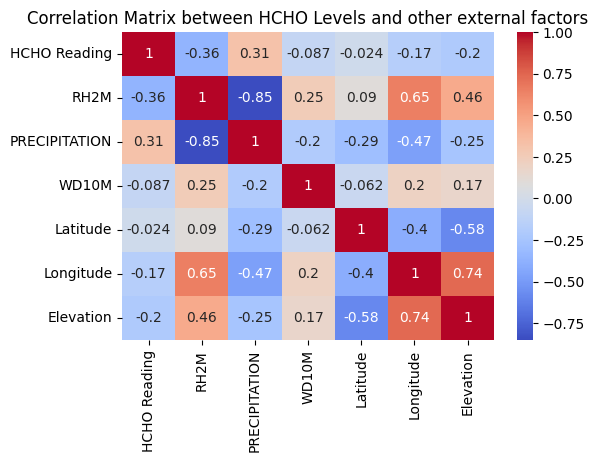

In [117]:
correlation_matrix = final_dataset[['HCHO Reading', 'RH2M', 'PRECIPITATION', 'WD10M', 'Latitude', 'Longitude', 'Elevation']].corr()

# Visualize correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and other external factors')
plt.show()

In [118]:
# Remove multicollinearity
final_dataset = final_dataset.drop(columns='RH2M')

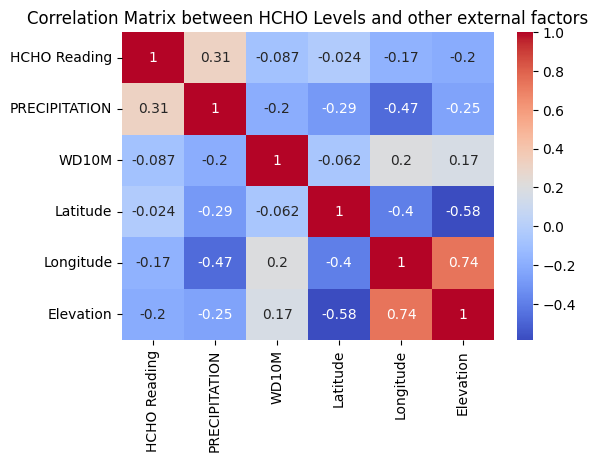

In [119]:
correlation_matrix = final_dataset[['HCHO Reading', 'PRECIPITATION', 'WD10M', 'Latitude', 'Longitude', 'Elevation']].corr()

# Visualize correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and other external factors')
plt.show()

In [120]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12572 entries, 0 to 12571
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HCHO Reading   12572 non-null  float64       
 1   Location       12572 non-null  object        
 2   Current Date   12572 non-null  datetime64[ns]
 3   Next Date      12572 non-null  datetime64[ns]
 4   PRECIPITATION  12572 non-null  float64       
 5   WD10M          12572 non-null  float64       
 6   Latitude       12572 non-null  float64       
 7   Longitude      12572 non-null  float64       
 8   Elevation      12572 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(1)
memory usage: 884.1+ KB


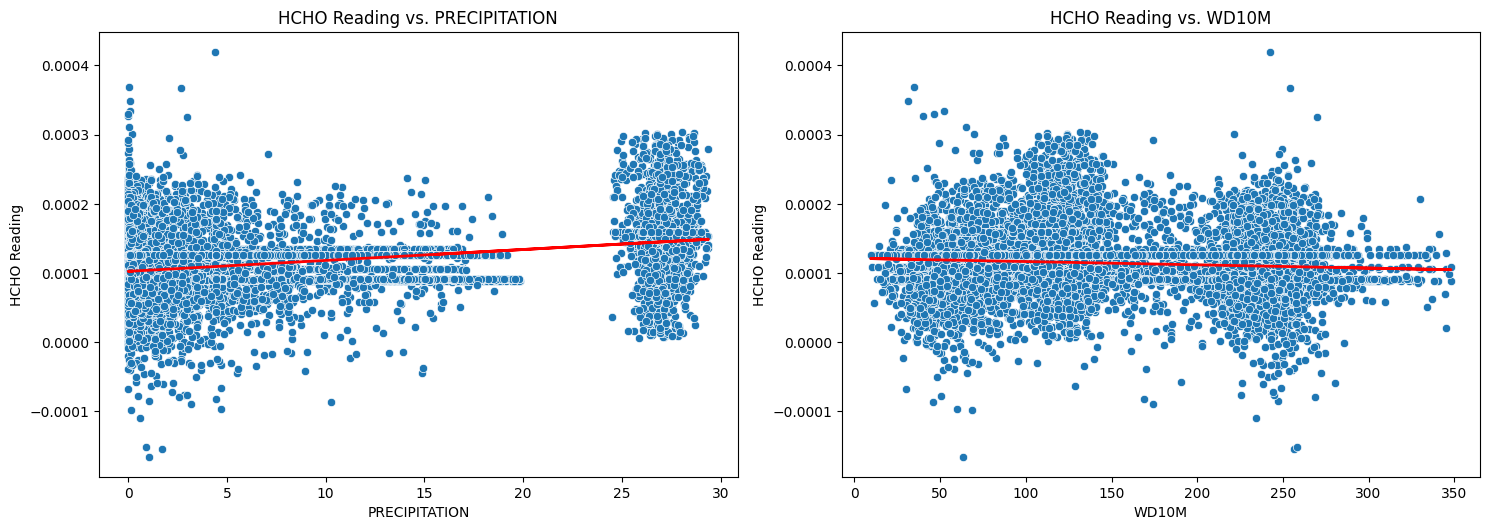

In [121]:
# Visualizing the relationship and trend betweeen the HCHO reading and the other weather factors in final dataset
model = LinearRegression()

# List of weather factors
weather_factors = ['PRECIPITATION', 'WD10M']

# Plot separate scatter plots with regression lines for HCHO reading versus each weather factor
plt.figure(figsize=(15, 10))
for i, factor in enumerate(weather_factors, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=final_dataset, x=factor, y='HCHO Reading')
    
    # Fit linear regression model
    X = final_dataset[[factor]]
    y = final_dataset['HCHO Reading']
    model.fit(X, y)
    
    # Plot regression line
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    plt.title(f'HCHO Reading vs. {factor}')
    plt.xlabel(factor)
    plt.ylabel('HCHO Reading')
plt.tight_layout()
plt.show()


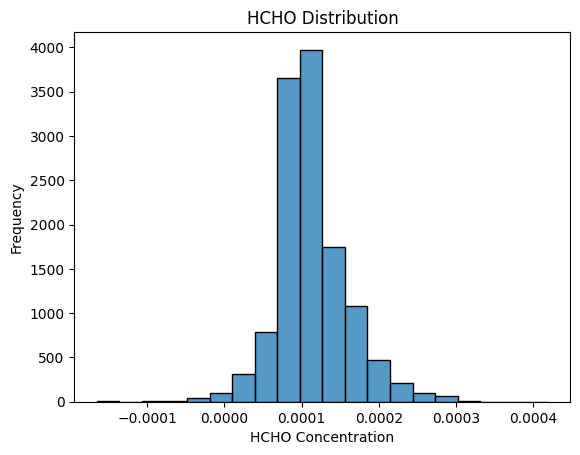

In [122]:
# Distribution fo HCHO Reading 
sns.histplot(final_dataset['HCHO Reading'], bins=20)
plt.title("HCHO Distribution")
plt.xlabel("HCHO Concentration")
plt.ylabel("Frequency")
plt.show()

In [123]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12572 entries, 0 to 12571
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HCHO Reading   12572 non-null  float64       
 1   Location       12572 non-null  object        
 2   Current Date   12572 non-null  datetime64[ns]
 3   Next Date      12572 non-null  datetime64[ns]
 4   PRECIPITATION  12572 non-null  float64       
 5   WD10M          12572 non-null  float64       
 6   Latitude       12572 non-null  float64       
 7   Longitude      12572 non-null  float64       
 8   Elevation      12572 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(1)
memory usage: 884.1+ KB


In [124]:
final_dataset.rename(columns={'PRECIPITATION': 'Precipitation'}, inplace=True)
final_dataset.rename(columns={'WD10M': 'Wind Direction'}, inplace=True)

In [125]:
# Check whether the time series is stationary
dataset_test = adfuller(final_dataset['HCHO Reading'], autolag='AIC')
test_output = pd.Series(dataset_test[0:4], index=[' Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dataset_test[4].items():
    test_output['Critical Value (%s) '%key] = value

print("Results of the Dickey-Fuller Test: \n\n", test_output)

Results of the Dickey-Fuller Test: 

  Test Statistic               -5.995888e+00
p-value                        1.702064e-07
#Lags Used                     3.400000e+01
Number of Observations Used    1.253700e+04
Critical Value (1%)           -3.430872e+00
Critical Value (5%)           -2.861771e+00
Critical Value (10%)          -2.566893e+00
dtype: float64


## Hyperparameter Tuning

Text(0.5, 1.0, 'Autocorrelation Function')

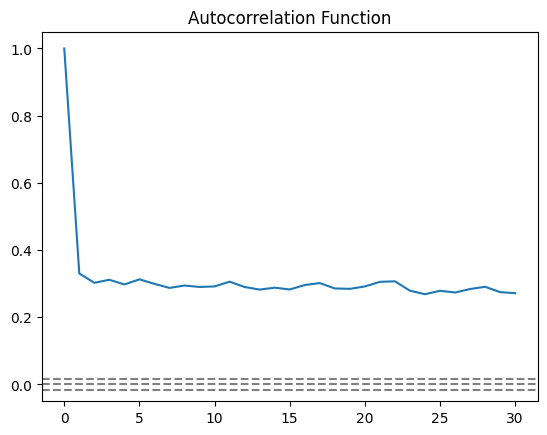

In [126]:
# Plot Autocorrelation Function plot
lag_acf = acf(final_dataset['HCHO Reading'], nlags=30)

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(final_dataset['HCHO Reading'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(final_dataset['HCHO Reading'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

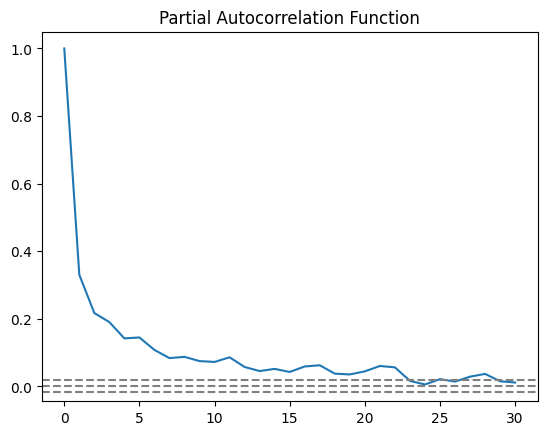

In [127]:
# Plot PACF
lag_pacf = pacf(final_dataset['HCHO Reading'], nlags=30, method='ols')

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(final_dataset['HCHO Reading'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(final_dataset['HCHO Reading'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

## Split the dataset to train and test data

In [128]:
# Split the final_dataset into training and testing sets with an 80:20 ratio
train_size = int(len(final_dataset) * 0.8)
train_data, test_data = final_dataset[:train_size], final_dataset[train_size:]

## ARIMA Model

In [129]:
# Apply ARIMA model
model = ARIMA(train_data['HCHO Reading'], order=(2,1,2))
model_fit = model.fit()

In [130]:
# Generate predictions
predictions = model_fit.predict(start=0, end=len(test_data) - 1)

## Cross Validation

In [131]:
# Calculate Mean Absolute Error 
mae = mean_absolute_error(test_data['HCHO Reading'], predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4.965107090392357e-05


In [132]:
# Calculate Mean Squared Error 
mse = mean_squared_error(test_data['HCHO Reading'], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.07106167399924e-09


In [133]:
# Calculate Root Mean Squared Error 
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 6.38048718672739e-05


In [134]:
# Calcualte Median Absolute Error
medae = median_absolute_error(test_data['HCHO Reading'], predictions)
print(f'Median Absolute Error: {medae}')


Median Absolute Error: 3.9892607890152566e-05


In [135]:
# Calculate R Squared
r_squared = r2_score(test_data['HCHO Reading'], predictions)
print('R-squared: ', r_squared)

R-squared:  -1.2539592515227596


### Finalize the dataset

In [136]:
# Create the final dataset
final_dataset.to_csv('datasets/dataset.csv', index=False)

In [137]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12572 entries, 0 to 12571
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   HCHO Reading    12572 non-null  float64       
 1   Location        12572 non-null  object        
 2   Current Date    12572 non-null  datetime64[ns]
 3   Next Date       12572 non-null  datetime64[ns]
 4   Precipitation   12572 non-null  float64       
 5   Wind Direction  12572 non-null  float64       
 6   Latitude        12572 non-null  float64       
 7   Longitude       12572 non-null  float64       
 8   Elevation       12572 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(1)
memory usage: 884.1+ KB
